In [1]:
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis, 
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)
 
# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

C:\Users\shriv\AppData\Local\Temp\ipykernel_11040\272811689.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
from sklearn.utils import shuffle
df = pd.read_csv('UNSW_NB15_training-set.csv')
df=shuffle(df)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82332 entries, 39099 to 30281
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             8233

In [4]:
df.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
39099,39100,0.018988,tcp,-,FIN,48,50,2958,32368,5108.489511,31,29,1.220560e+06,1.336465e+07,7,18,0.397298,0.375449,22.882495,22.612623,255,3730147694,1585071650,255,0.000719,0.000581,0.000138,62,647,0,0,8,0,8,1,1,1,0,0,0,2,6,0,Normal,0
60433,60434,0.000002,udp,-,INT,2,0,104,0,500000.001300,254,0,2.080000e+08,0.000000e+00,0,0,0.002000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,2,2,1,1,1,1,0,0,0,1,6,0,Fuzzers,1
64815,64816,0.000010,udp,dns,INT,2,0,114,0,100000.002500,254,0,4.560000e+07,0.000000e+00,0,0,0.010000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,9,2,4,4,4,4,0,0,0,5,9,0,Generic,1
6511,6512,0.000008,unas,-,INT,2,0,200,0,125000.000300,254,0,1.000000e+08,0.000000e+00,0,0,0.008000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,100,0,0,0,7,2,3,2,2,7,0,0,0,2,7,0,Exploits,1
51625,51626,0.000004,udp,dns,INT,2,0,114,0,250000.000600,254,0,1.140000e+08,0.000000e+00,0,0,0.004000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,6,2,4,4,4,4,0,0,0,4,6,0,Generic,1
58702,58703,0.000004,udp,dns,INT,2,0,114,0,250000.000600,254,0,1.140000e+08,0.000000e+00,0,0,0.004000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,8,2,4,4,2,4,0,0,0,4,8,0,Generic,1
81959,81960,0.910543,tcp,-,FIN,10,8,534,354,18.670178,254,252,4.226050e+03,2.723649e+03,2,1,98.962333,109.201289,5614.532779,190.019688,255,2890089962,1500189809,255,0.228667,0.146128,0.082539,53,44,0,0,5,1,2,2,2,3,0,0,0,5,3,0,Normal,0
4892,4893,0.000009,ipx-n-ip,-,INT,2,0,200,0,111111.107200,254,0,8.888889e+07,0.000000e+00,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,100,0,0,0,4,2,3,3,3,4,0,0,0,18,4,0,Exploits,1
38100,38101,0.153979,tcp,-,FIN,86,86,4966,77276,1110.541023,31,29,2.550478e+05,3.968229e+06,7,36,1.806388,1.804882,97.807765,2.546635,255,1379732852,1427436452,255,0.000692,0.000560,0.000132,58,899,0,0,5,0,4,1,1,3,0,0,0,4,4,0,Normal,0
48850,48851,0.000008,unas,-,INT,2,0,200,0,125000.000300,254,0,1.000000e+08,0.000000e+00,0,0,0.008000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,100,0,0,0,10,2,5,4,4,4,0,0,0,4,10,0,Analysis,1


In [5]:
df.describe(include='all')

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,82332.000000,82332.000000,82332,82332,82332,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.00000,8.233200e+04,8.233200e+04,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332,82332.000000
unique,NaN,NaN,131,13,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,43095,47153,39339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37000,NaN
mean,41166.500000,1.006756,NaN,NaN,NaN,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,4.753692,6.308556,755.394301,121.701284,6.363075e+03,535.180430,133.45908,1.084642e+09,1.073465e+09,128.28662,0.055925,0.029256,0.026669,139.528604,116.275069,0.094277,1.595372e+03,9.546604,1.369273,5.744923,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,NaN,0.550600
std,23767.345519,4.710444,NaN,NaN,NaN,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,64.649620,55.708021,6182.615732,1292.378499,5.672402e+04,3635.305383,127.35700,1.390860e+09,1.381996e+09,127.49137,0.116022,0.070854,0.055094,208.472063,244.600271,0.542922,3.806697e+04,11.090289,1.067188,8.418112,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,NaN,0.497436
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,20583.750000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,NaN,0.000000
50%,41166.500000,0.014138,NaN,NaN,NaN,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,1.000000,0.000000,0.557929,0.010000,1.762392e+01,0.000000,255.00000,2.788886e+07,2.856975e+07,255.00000,0.000551,0.000441,0.000080,65.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,NaN,1.000000
75%,61749.250000,0.719360,NaN,NaN,NaN,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,3.000000,2.000000,63.409444,63.136369,3.219332e+03,128.459914,255.00000,2.171310e+09,2.144205e+09,255.00000,0.105541,0.052596,0.048816,100.000000,87.000000,0.

In [6]:
list_drop = ['id','attack_cat']


In [7]:
df.drop(list_drop,axis=1,inplace=True)

In [8]:
# Clamp extreme Values
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.00000,8.233200e+04,8.233200e+04,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,4.753692,6.308556,755.394301,121.701284,6.363075e+03,535.180430,133.45908,1.084642e+09,1.073465e+09,128.28662,0.055925,0.029256,0.026669,139.528604,116.275069,0.094277,1.595372e+03,9.546604,1.369273,5.744923,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,64.649620,55.708021,6182.615732,1292.378499,5.672402e+04,3635.305383,127.35700,1.390860e+09,1.381996e+09,127.49137,0.116022,0.070854,0.055094,208.472063,244.600271,0.542922,3.806697e+04,11.090289,1.067188,8.418112,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,1.000000,0.000000,0.557929,0.010000,1.762392e+01,0.000000,255.00000,2.788886e+07,2.856975e+07,255.00000,0.000551,0.000441,0.000080,65.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,3.000000,2.000000,63.409444,63.136369,3.219332e+03,128.459914,255.00000,2.171310e+09,2.144205e+09,255.00000,0.105541,0.052596,0.048816,100.000000,87.000000,0.000000,0.000000e+00,11.000000,2.000000,6.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,5319.000000,5507.000000,60009.992000,57739.240000,1.483831e+06,463199.240100,255.00000,4.294950e+09,4.294881e+09,255.00000,3.821465,3.226788,2.928778,1504.000000,1500.000000,131.000000,5.242880e+06,63.000000,6.000000,59.000000,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [9]:
DEBUG =0

for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('max = '+str(df_numeric[feature].max()))
        print('75th = '+str(df_numeric[feature].quantile(0.95)))
        print('median = '+str(df_numeric[feature].median()))
        print(df_numeric[feature].max()>10*df_numeric[feature].median())
        print('----------------------------------------------------')
    if df_numeric[feature].max()>10*df_numeric[feature].median() and df_numeric[feature].max()>10 :
        df[feature] = np.where(df[feature]<df[feature].quantile(0.95), df[feature], df[feature].quantile(0.95))

In [10]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.00000,8.233200e+04,8.233200e+04,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,0.445016,11.84186,9.178424,1580.566135,2866.918367,71576.702810,180.967667,95.713003,4.649418e+07,3.105380e+05,2.188068,2.542729,37.836042,33.982038,1920.889858,199.566224,133.45908,1.074064e+09,1.062670e+09,128.28662,0.055925,0.029256,0.026669,124.772822,100.240891,0.092091,9.643063,9.259887,1.369273,5.269591,4.466611,3.388901,7.160679,0.008284,0.008381,0.092066,5.974809,8.832532,0.011126,0.550600
std,0.672222,15.66461,14.504212,2948.850472,7525.606738,102631.946850,101.513358,116.667722,7.417784e+07,8.918691e+05,3.057946,4.767511,57.658385,52.184248,2900.509949,520.285264,127.35700,1.368335e+09,1.358850e+09,127.49137,0.116022,0.070854,0.055094,148.294212,184.094183,0.289156,35.977508,10.221752,1.067188,6.729755,6.685037,5.029129,10.481621,0.091171,0.092485,0.289121,6.867156,10.124902,0.104891,0.497436
min,0.000000,1.00000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.00000,0.000000,114.000000,0.000000,28.606114,62.000000,0.000000,1.120247e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,6.00000,2.000000,534.000000,178.000000,2650.176667,254.000000,29.000000,5.770032e+05,2.112951e+03,1.000000,0.000000,0.557929,0.010000,17.623918,0.000000,255.00000,2.788886e+07,2.856975e+07,255.00000,0.000551,0.000441,0.000080,65.000000,44.000000,0.000000,0.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,12.00000,10.000000,1280.000000,956.000000,111111.107200,254.000000,252.000000,6.514286e+07,1.585808e+04,3.000000,2.000000,63.409444,63.136369,3219.332412,128.459914,255.00000,2.171310e+09,2.144205e+09,255.00000,0.105541,0.052596,0.048816,100.000000,87.000000,0.000000,0.000000,11.000000,2.000000,6.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,2.403792,60.00000,54.000000,12472.000000,30622.000000,333333.321500,255.000000,253.000000,2.666667e+08,3.741446e+06,11.000000,18.000000,204.530258,167.626851,9532.382646,2218.933526,255.00000,3.876194e+09,3.862459e+09,255.00000,3.821465,3.226788,2.928778,638.000000,683.000000,1.000000,150.450000,37.000000,6.000000,25.000000,25.000000,18.000000,37.000000,2.000000,2.000000,1.000000,25.000000,36.000000,1.000000,1.000000


In [11]:
df_numeric = df.select_dtypes(include=[np.number])
df_before = df_numeric.copy()
DEBUG = 0
for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_numeric[feature].nunique()))
        print(df_numeric[feature].nunique()>50)
        print('----------------------------------------------------')
    if df_numeric[feature].nunique()>50:
        if df_numeric[feature].min()==0:
            df[feature] = np.log(df[feature]+1)
        else:
            df[feature] = np.log(df[feature])

df_numeric = df.select_dtypes(include=[np.number])

In [12]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,131,13,7
top,tcp,-,FIN
freq,43095,47153,39339


In [13]:
DEBUG = 0
for feature in df_cat.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_cat[feature].nunique()))
        print(df_cat[feature].nunique()>6)
        print(sum(df[feature].isin(df[feature].value_counts().head().index)))
        print('----------------------------------------------------')
    
    if df_cat[feature].nunique()>6:
        df[feature] = np.where(df[feature].isin(df[feature].value_counts().head().index), df[feature], '-')

In [14]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,6,5,6
top,tcp,-,FIN
freq,43095,49275,39339


In [15]:
df['proto'].value_counts().head().index

Index(['tcp', 'udp', '-', 'unas', 'arp'], dtype='object', name='proto')

In [16]:
df['proto'].value_counts().index

Index(['tcp', 'udp', '-', 'unas', 'arp', 'ospf'], dtype='object', name='proto')

In [17]:
from sklearn.feature_selection import SelectKBest, chi2
import plotly.graph_objects as go

best_features = SelectKBest(score_func=chi2, k='all')

X = df.iloc[:, 4:-2]
y = df.iloc[:, -1]
fit = best_features.fit(X, y)

df_scores = pd.DataFrame(fit.scores_)
df_col = pd.DataFrame(X.columns)

feature_score = pd.concat([df_col, df_scores], axis=1)
feature_score.columns = ['feature', 'score']
feature_score.sort_values(by=['score'], ascending=True, inplace=True)

fig = go.Figure(go.Bar(
    x=feature_score['feature'][0:21],
    y=feature_score['score'][0:21],
    orientation='v'))

fig.update_layout(
    title="Top 20 Features",
    height=1000,
    width=1000,
    showlegend=False,
    xaxis_title="Feature",
    yaxis_title="Score",
    font=dict(size=20),
    xaxis=dict(autorange='reversed'), # Reverse the y-axis to mirror the graph horizontally
    margin=dict(b=200)
)

fig.show()


In [18]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [19]:
X.head()
feature_names = list(X.columns)
np.shape(X)

(82332, 42)

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [21]:
np.shape(X)

(82332, 56)

In [22]:
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,6,5,6
top,tcp,-,FIN
freq,43095,49275,39339


In [23]:
X[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.88099779e-02, 3.87120101e+00, 3.93182563e+00,
       7.99226864e+00, 1.03295066e+01, 8.53885478e+00, 3.10000000e+01,
       2.90000000e+01, 1.40148215e+01, 1.51349829e+01, 7.00000000e+00,
       1.80000000e+01, 3.34540372e-01, 3.18780223e-01, 3.17314576e+00,
       3.16178144e+00, 2.55000000e+02, 2.20397137e+01, 2.11838954e+01,
       2.55000000e+02, 7.18741643e-04, 5.80831285e-04, 1.37990479e-04,
       4.12713439e+00, 6.47389070e+00, 0.00000000e+00, 0.00000000e+00,
       8.00000000e+00, 0.00000000e+00, 8.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.00000000e+00, 6.00000000e+00, 0.00000000e+00])

In [24]:
len(feature_names)

42

In [25]:
for label in list(df_cat['state'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)
    
for label in list(df_cat['service'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)
    
for label in list(df_cat['proto'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

In [26]:
len(feature_names)

56

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0,
                                                    stratify=y)


In [28]:
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,6,5,6
top,tcp,-,FIN
freq,43095,49275,39339


In [29]:
# 6 + 5 + 6 unique = 17, therefore the first 17 rows will be the categories that have been encoded, start scaling from row 18 only.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 18:] = sc.fit_transform(X_train[:, 18:])
X_test[:, 18:] = sc.transform(X_test[:, 18:])

In [30]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])


In [31]:
%%time
from sklearn.linear_model import LogisticRegression
start = time.time()
model = LogisticRegression().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: total: 219 ms
Wall time: 735 ms


In [32]:
import numpy as np

# Calculate accuracy
correct_predictions = np.sum(y_test == y_predictions)
total_samples = len(y_test)
accuracy = correct_predictions / total_samples

# Calculate true positives, false positives, false negatives
true_positives = np.sum((y_test == 1) & (y_predictions == 1))
false_positives = np.sum((y_test == 0) & (y_predictions == 1))
false_negatives = np.sum((y_test == 1) & (y_predictions == 0))

# Calculate precision
precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0

# Calculate recall
recall= true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision+ recall) if (precision + recall) != 0 else 0

print("Accuracy: {:.2%}".format(accuracy))
print("Recall: {:.2%}".format(recall))
print("Precision: {:.2%}".format(precision))
print("F1-Score: {:.2%}".format(f1_score))

# Print other performance metrics if available
print("Time_to_train_method2: {:.2f} s".format(end_train - start))
print("Time_to_predict_method2: {:.2f} s".format(end_predict - end_train))
print("Total_time_method2: {:.2f} s".format(end_predict - start))
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1_score,end_train-start,end_predict-end_train,end_predict-start]


Accuracy: 92.81%
Recall: 92.92%
Precision: 93.96%
F1-Score: 93.43%
Time_to_train_method2: 0.73 s
Time_to_predict_method2: 0.00 s
Total_time_method2: 0.73 s


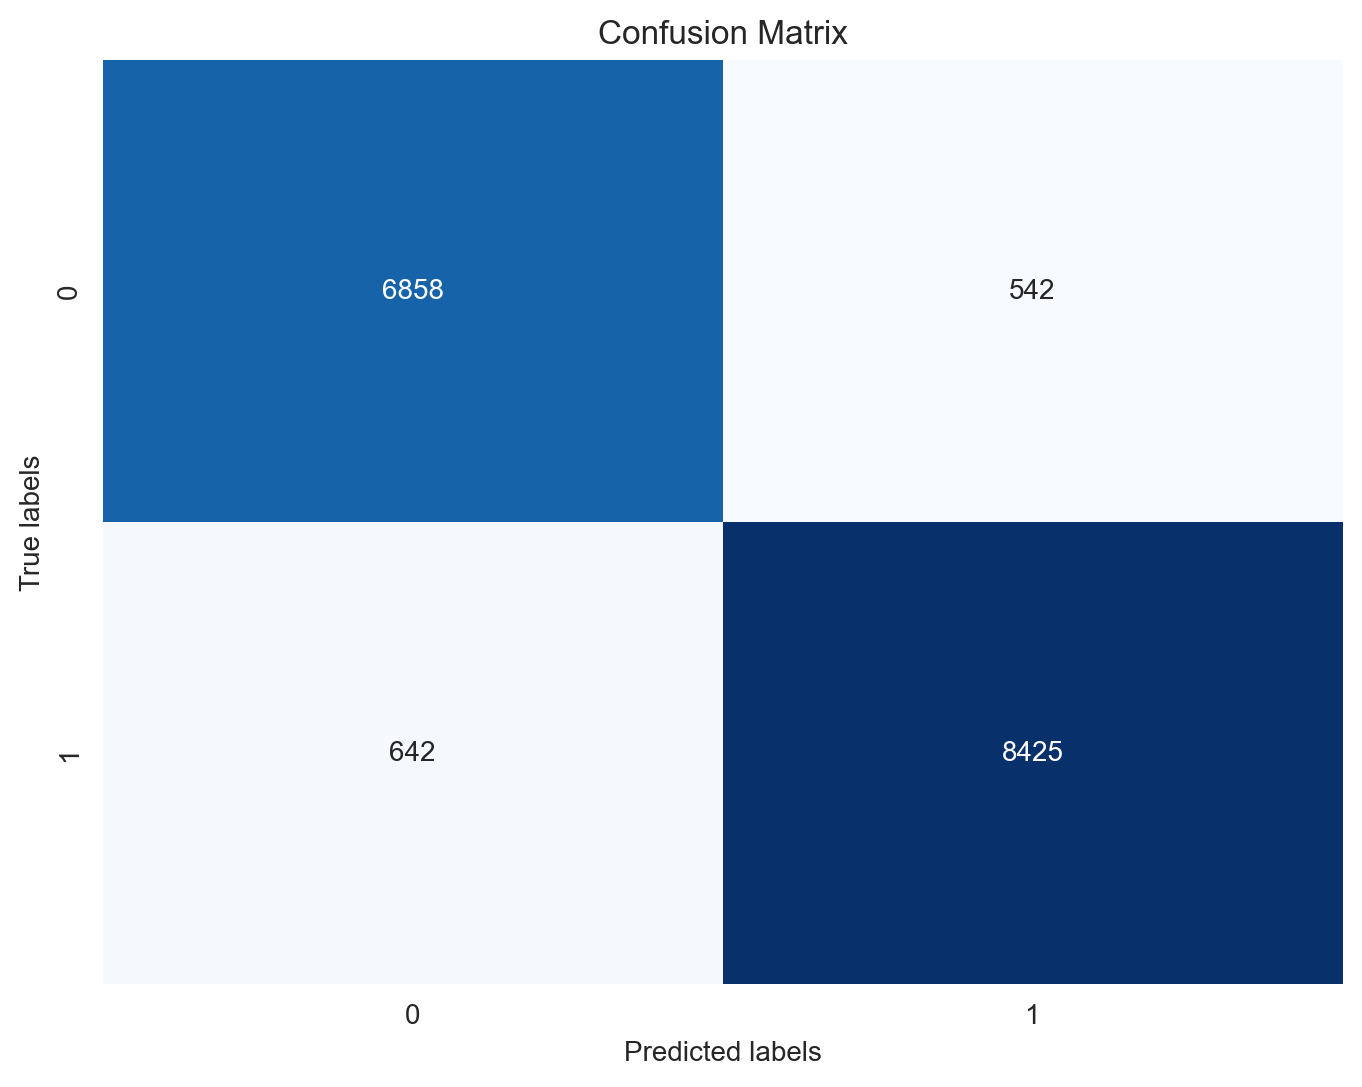

In [33]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming model.predict(X_test) gives the predicted labels
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
 


In [105]:
%%time
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
model = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: total: 5.22 s
Wall time: 3.92 s


In [106]:
import numpy as np

# Calculate accuracy
correct_predictions = np.sum(y_test == y_predictions)
total_samples = len(y_test)
accuracy = correct_predictions / total_samples

# Calculate true positives, false positives, false negatives
true_positives = np.sum((y_test == 1) & (y_predictions == 1))
false_positives = np.sum((y_test == 0) & (y_predictions == 1))
false_negatives = np.sum((y_test == 1) & (y_predictions == 0))

# Calculate precision
precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0

# Calculate recall
recall= true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision+ recall) if (precision + recall) != 0 else 0

print("Accuracy: {:.2%}".format(accuracy))
print("Recall: {:.2%}".format(recall))
print("Precision: {:.2%}".format(precision))
print("F1-Score: {:.2%}".format(f1_score))

# Print other performance metrics if available
print("Time_to_train_method2: {:.2f} s".format(end_train - start))
print("Time_to_predict_method2: {:.2f} s".format(end_predict - end_train))
print("Total_time_method2: {:.2f} s".format(end_predict - start))
model_performance.loc['kNN'] = [accuracy, recall, precision, f1_score,end_train-start,end_predict-end_train,end_predict-start]


Accuracy: 96.22%
Recall: 96.11%
Precision: 96.98%
F1-Score: 96.54%
Time_to_train_method2: 0.15 s
Time_to_predict_method2: 3.78 s
Total_time_method2: 3.92 s


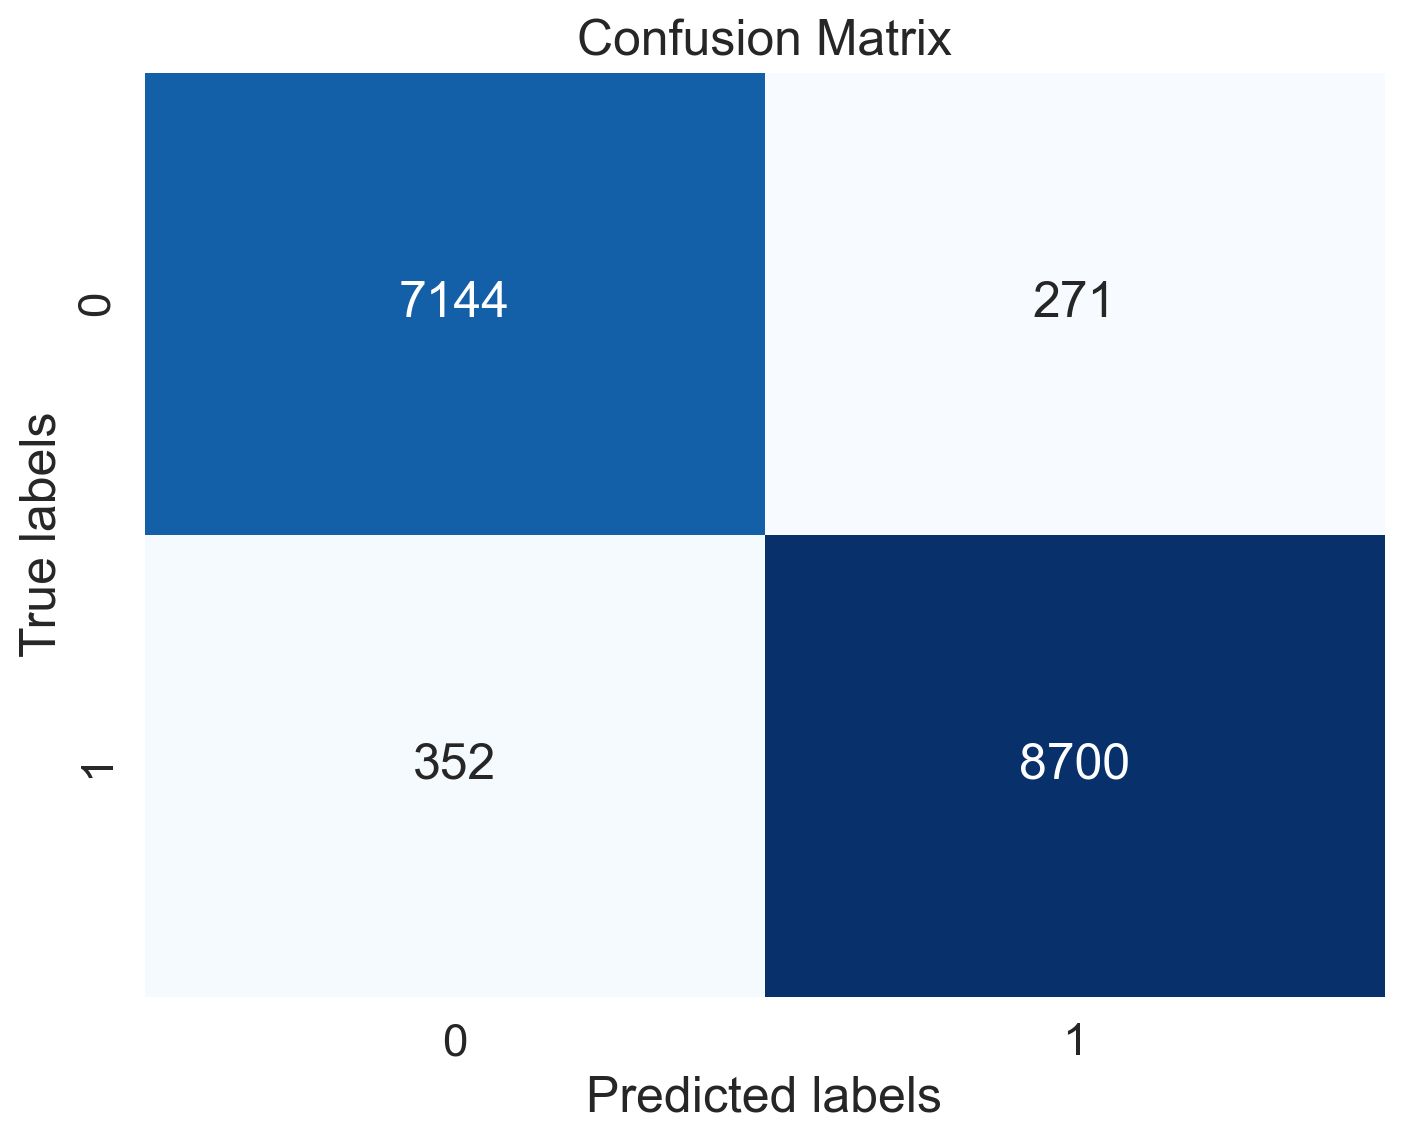

In [107]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming model.predict(X_test) gives the predicted labels
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
 

In [69]:

%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model = DecisionTreeClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: total: 625 ms
Wall time: 1.1 s


In [70]:
import numpy as np

# Calculate accuracy
correct_predictions = np.sum(y_test == y_predictions)
total_samples = len(y_test)
accuracy = correct_predictions / total_samples

# Calculate true positives, false positives, false negatives
true_positives = np.sum((y_test == 1) & (y_predictions == 1))
false_positives = np.sum((y_test == 0) & (y_predictions == 1))
false_negatives = np.sum((y_test == 1) & (y_predictions == 0))

# Calculate precision
precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0

# Calculate recall
recall= true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision+ recall) if (precision + recall) != 0 else 0

print("Accuracy: {:.2%}".format(accuracy))
print("Recall: {:.2%}".format(recall))
print("Precision: {:.2%}".format(precision))
print("F1-Score: {:.2%}".format(f1_score))

# Print other performance metrics if available
print("Time_to_train_method2: {:.2f} s".format(end_train - start))
print("Time_to_predict_method2: {:.2f} s".format(end_predict - end_train))
print("Total_time_method2: {:.2f} s".format(end_predict - start))
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1_score,end_train-start,end_predict-end_train,end_predict-start]


Accuracy: 96.54%
Recall: 96.94%
Precision: 96.77%
F1-Score: 96.85%
Time_to_train_method2: 1.10 s
Time_to_predict_method2: 0.01 s
Total_time_method2: 1.10 s


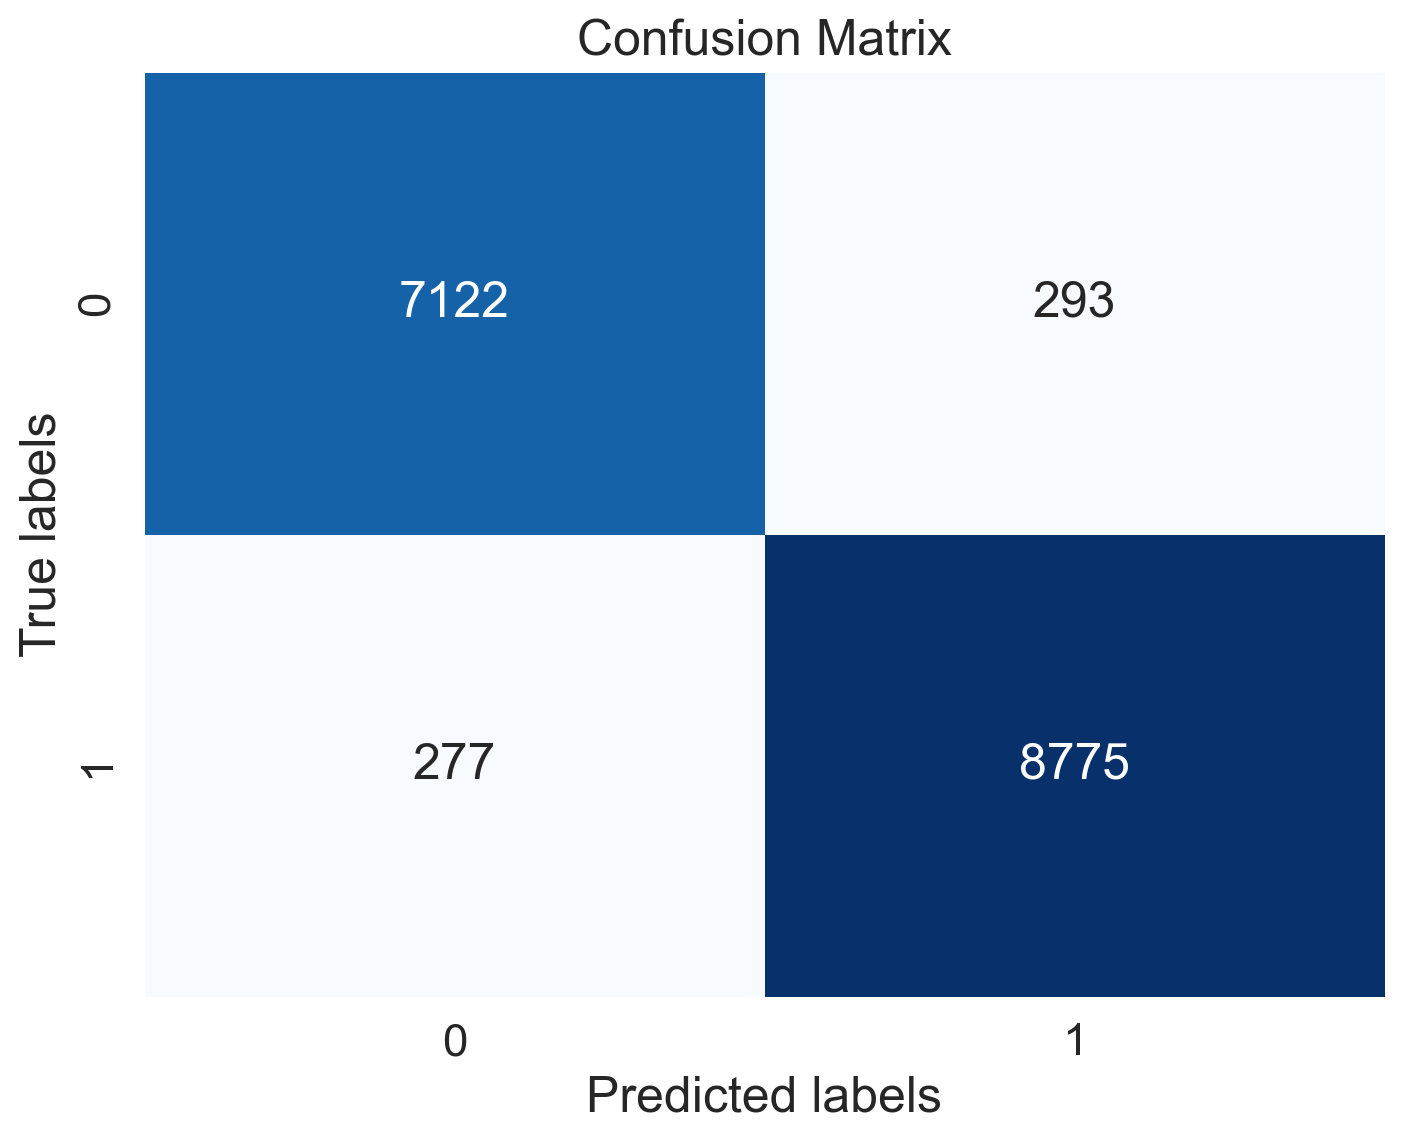

In [71]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming model.predict(X_test) gives the predicted labels
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

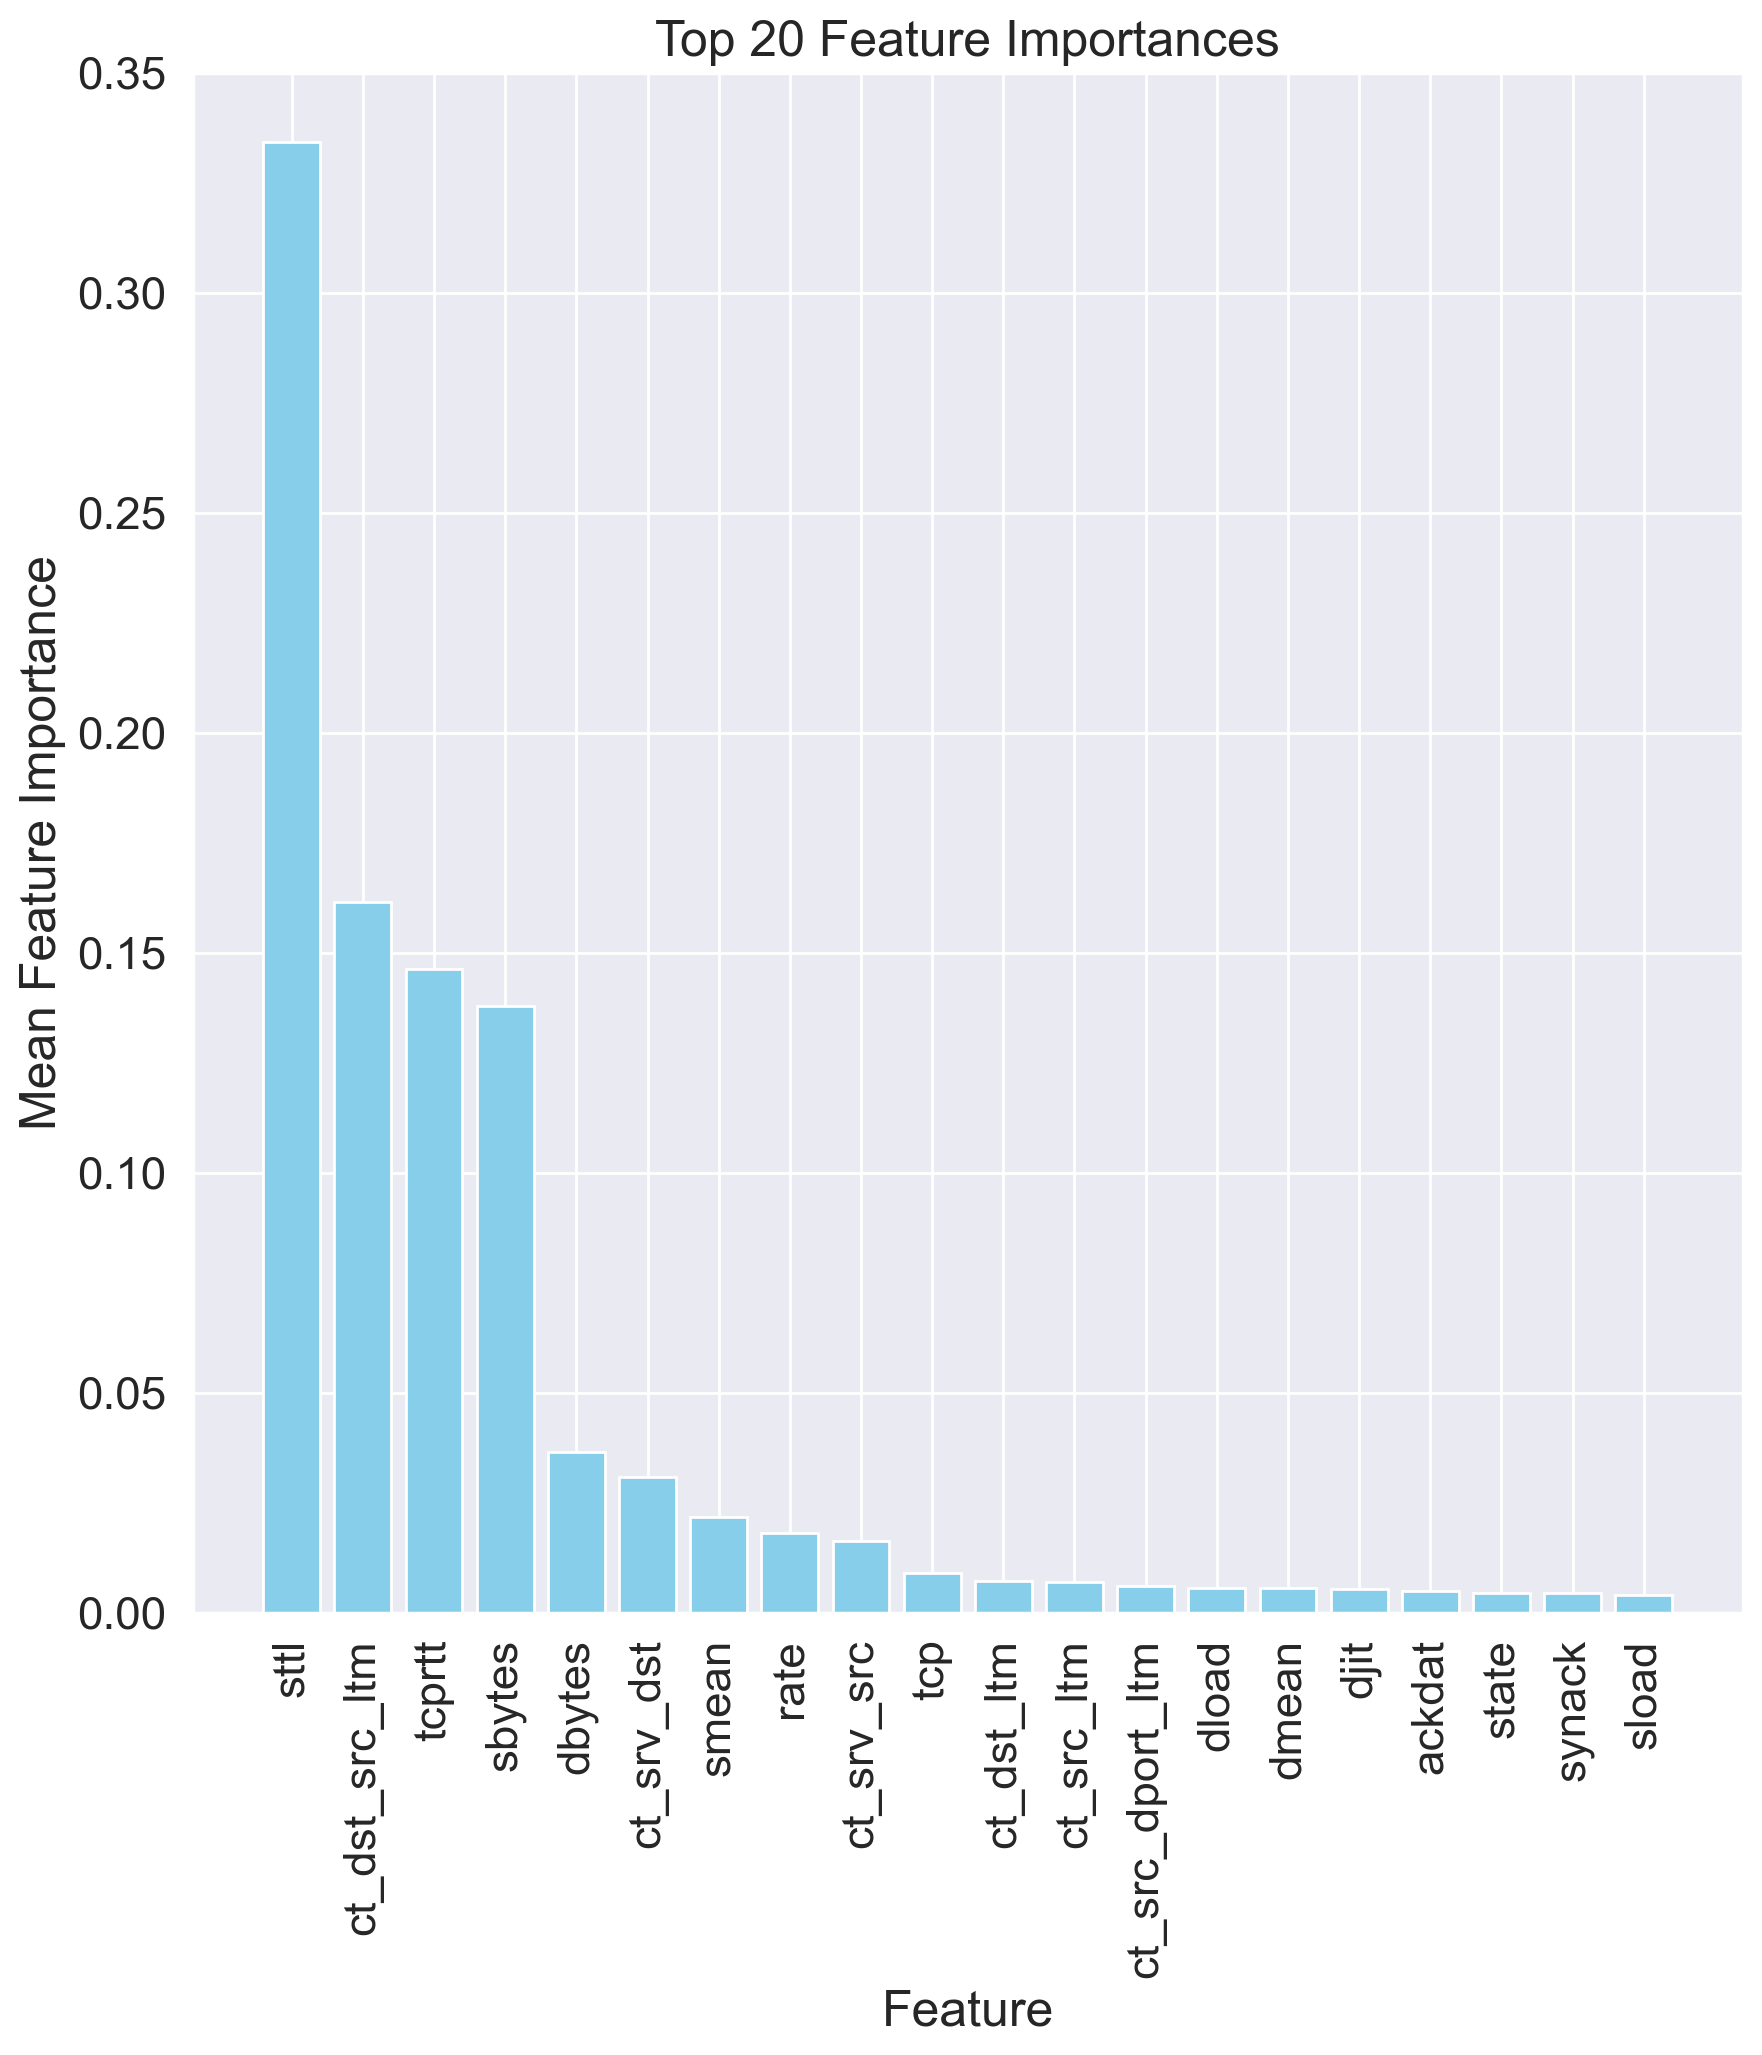

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 10)
sns.set_style("white")

# Increase font size
sns.set(font_scale=1.5)

feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
top_features = feat_importances.nlargest(20)

plt.bar(top_features.index, top_features.values, color='skyblue')  # Vertical bar plot
plt.xlabel('Feature')
plt.ylabel('Mean Feature Importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to start from bottom
plt.ylim(0, 0.35)  # Set y-axis limits from 0 to 0.35
plt.xticks(rotation=90)  # Rotate x-axis labels to vertical
plt.show()


In [73]:

%%time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier(n_estimators=5, n_jobs=-1, random_state=0, bootstrap=True).fit(X_train, y_train)

end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: total: 562 ms
Wall time: 364 ms


In [74]:
import numpy as np

# Calculate accuracy
correct_predictions = np.sum(y_test == y_predictions)
total_samples = len(y_test)
accuracy = correct_predictions / total_samples

# Calculate true positives, false positives, false negatives
true_positives = np.sum((y_test == 1) & (y_predictions == 1))
false_positives = np.sum((y_test == 0) & (y_predictions == 1))
false_negatives = np.sum((y_test == 1) & (y_predictions == 0))

# Calculate precision
precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0

# Calculate recall
recall= true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision+ recall) if (precision + recall) != 0 else 0

print("Accuracy: {:.2%}".format(accuracy))
print("Recall: {:.2%}".format(recall))
print("Precision: {:.2%}".format(precision))
print("F1-Score: {:.2%}".format(f1_score))

# Print other performance metrics if available
print("Time_to_train_method2: {:.2f} s".format(end_train - start))
print("Time_to_predict_method2: {:.2f} s".format(end_predict - end_train))
print("Total_time_method2: {:.2f} s".format(end_predict - start))
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1_score,end_train-start,end_predict-end_train,end_predict-start]


Accuracy: 96.89%
Recall: 96.92%
Precision: 97.41%
F1-Score: 97.16%
Time_to_train_method2: 0.34 s
Time_to_predict_method2: 0.02 s
Total_time_method2: 0.36 s


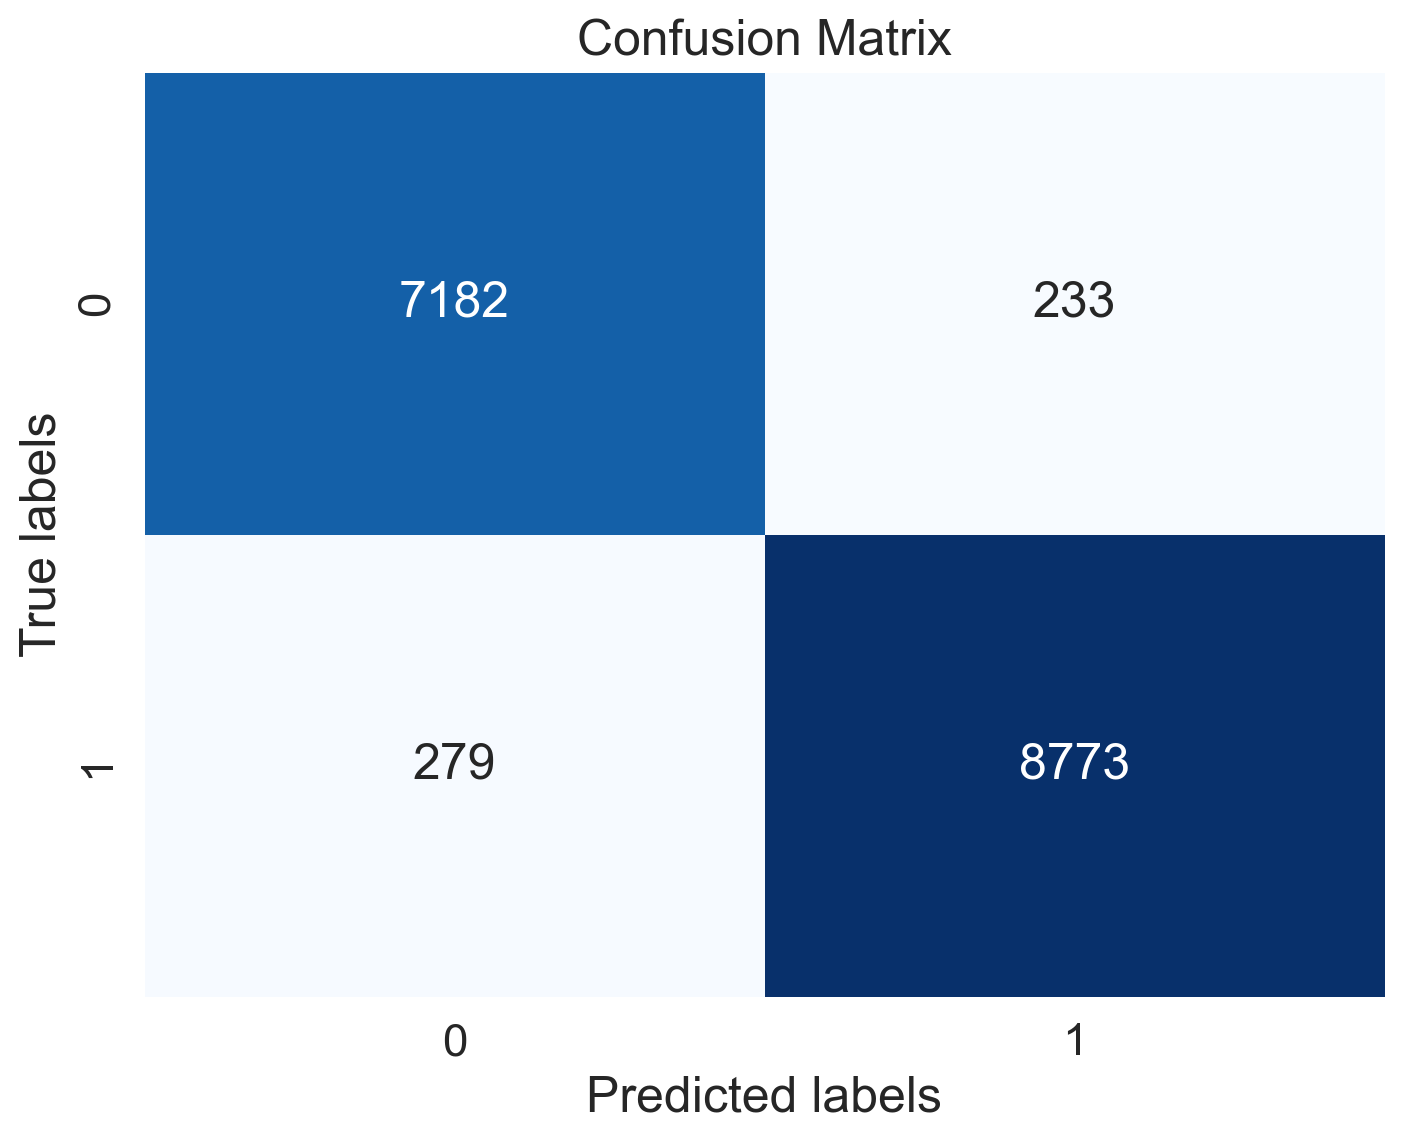

In [75]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming model.predict(X_test) gives the predicted labels
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

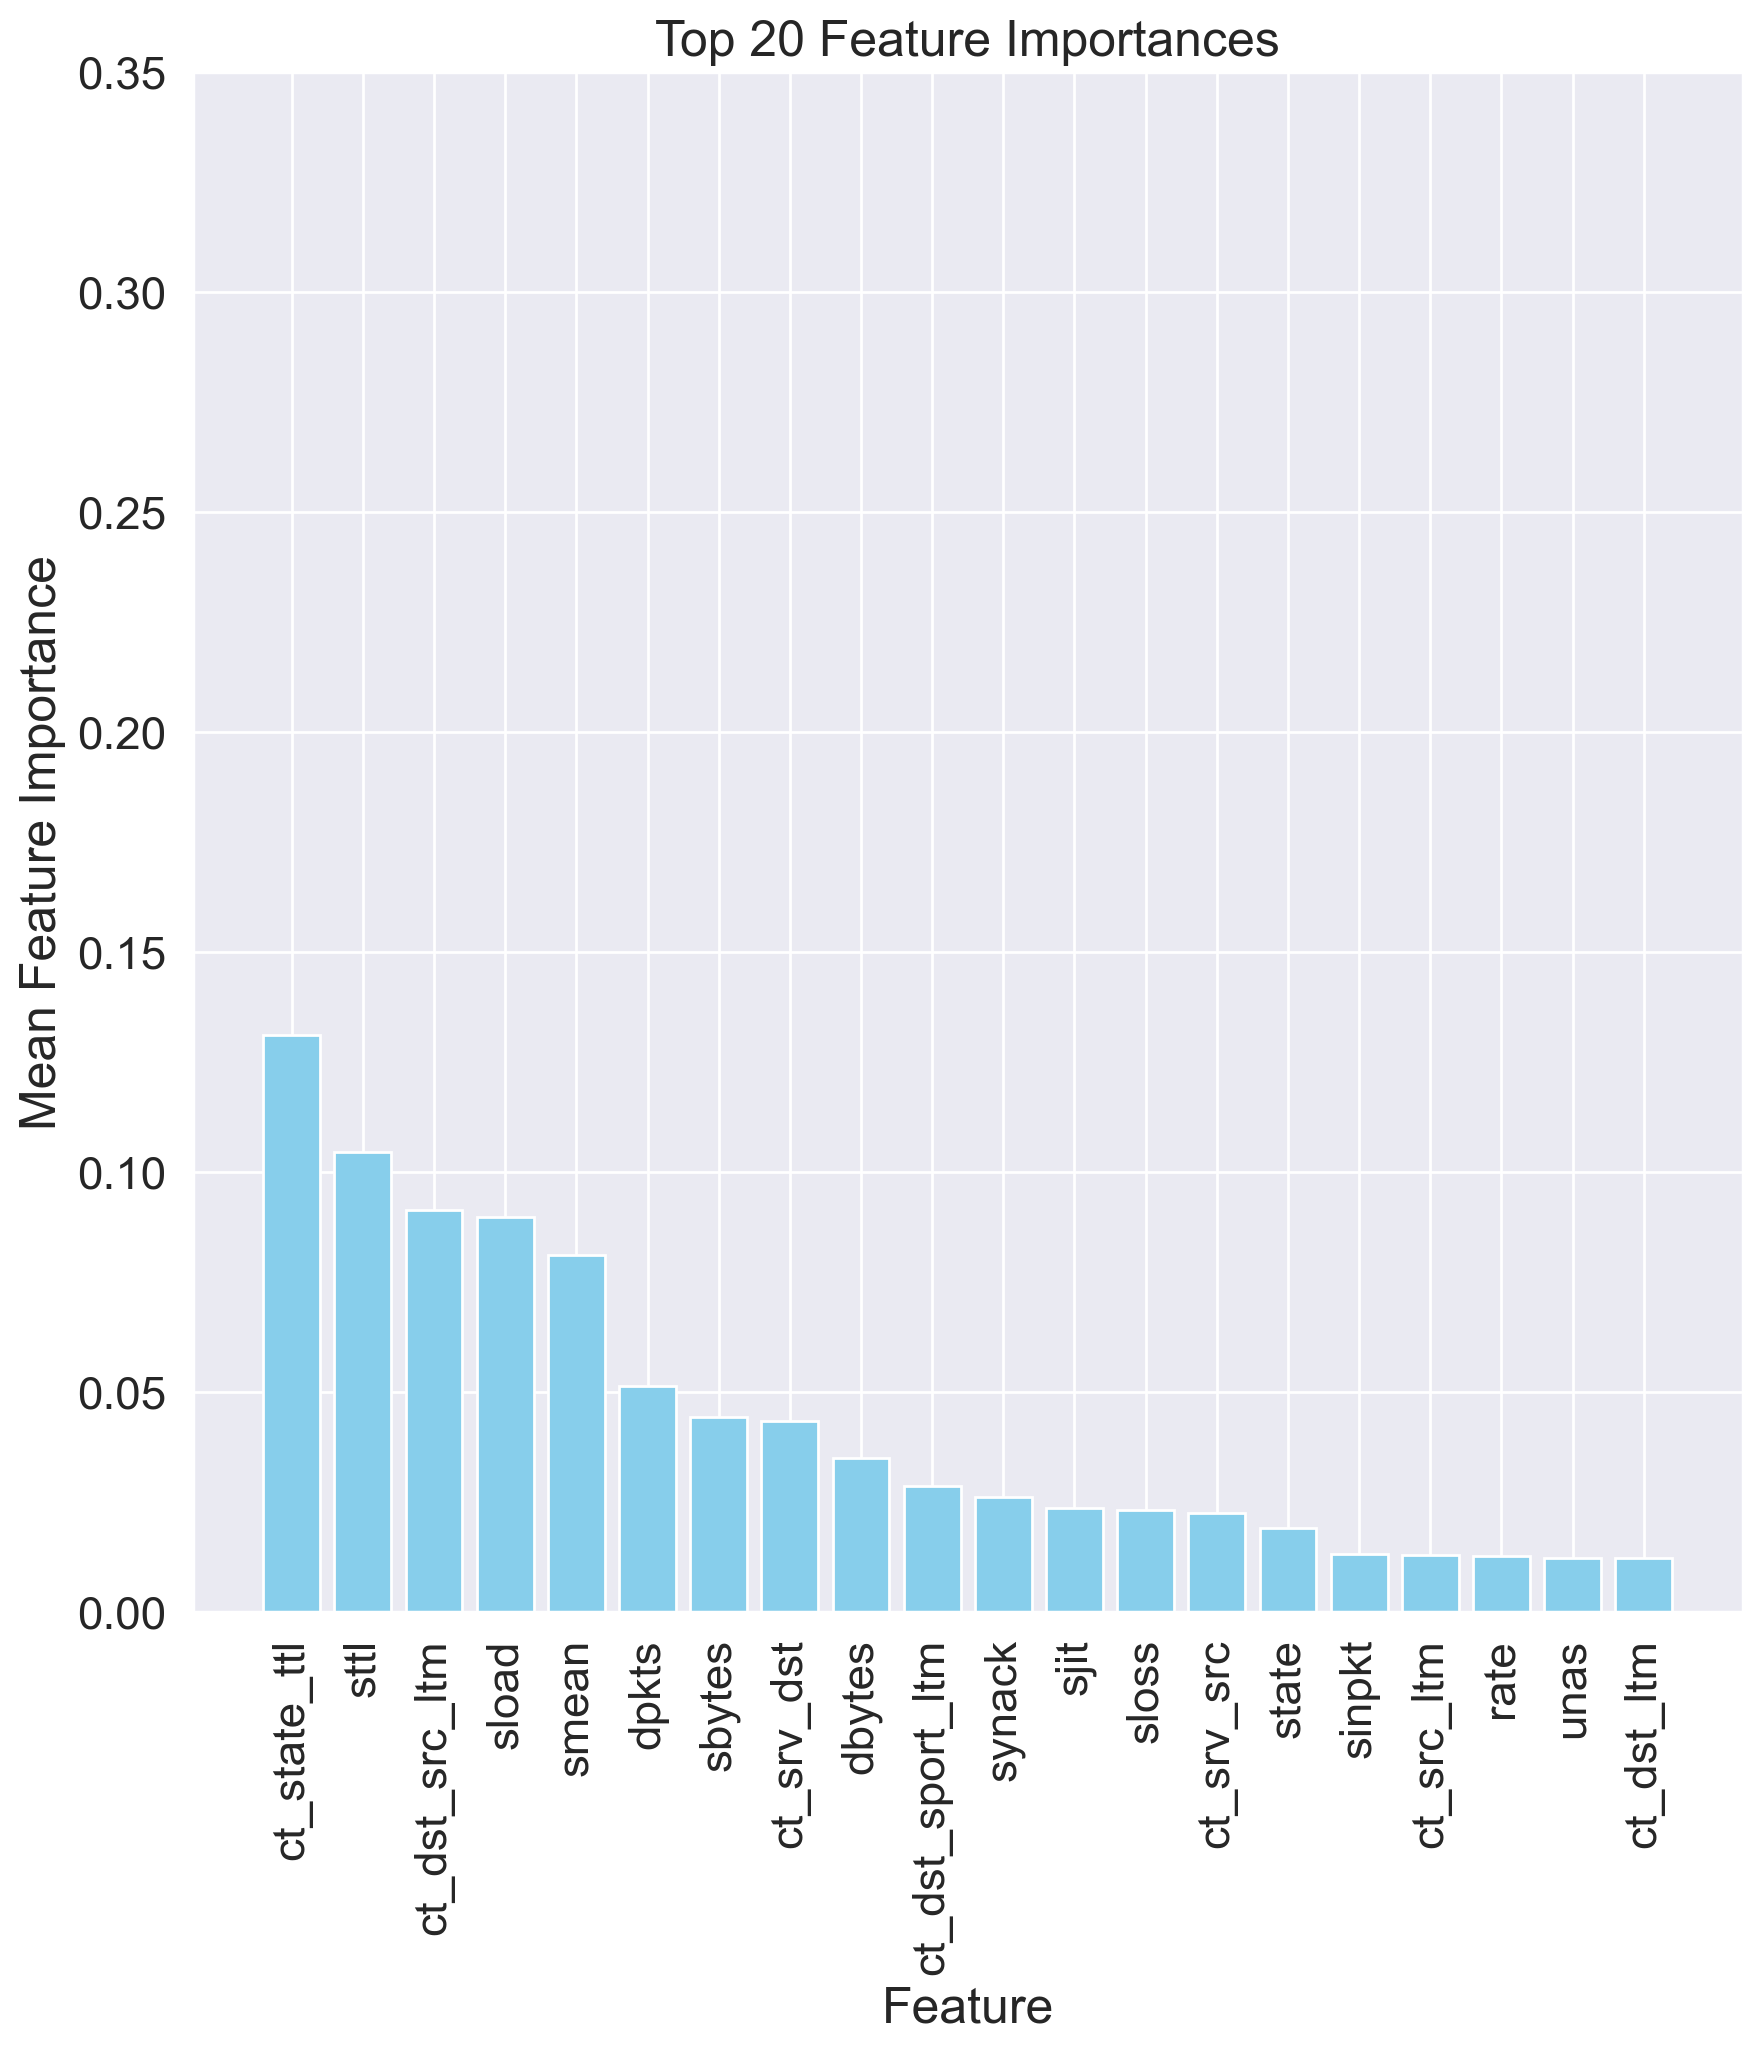

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 10)
sns.set_style("white")

# Increase font size
sns.set(font_scale=1.5)

feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
top_features = feat_importances.nlargest(20)

plt.bar(top_features.index, top_features.values, color='skyblue')  # Vertical bar plot
plt.xlabel('Feature')
plt.ylabel('Mean Feature Importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to start from bottom
plt.ylim(0, 0.35)  # Set y-axis limits from 0 to 0.35
plt.xticks(rotation=90)  # Rotate x-axis labels to vertical
plt.show()


In [45]:
%%time
from sklearn.neural_network import MLPClassifier
start = time.time()
model = MLPClassifier(hidden_layer_sizes = (20,20,), 
                      activation='relu', 
                      solver='adam',
                      batch_size=2000,
                      verbose=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: total: 13.4 s
Wall time: 21.7 s


In [46]:
import numpy as np

# Calculate accuracy
correct_predictions = np.sum(y_test == y_predictions)
total_samples = len(y_test)
accuracy = correct_predictions / total_samples

# Calculate true positives, false positives, false negatives
true_positives = np.sum((y_test == 1) & (y_predictions == 1))
false_positives = np.sum((y_test == 0) & (y_predictions == 1))
false_negatives = np.sum((y_test == 1) & (y_predictions == 0))

# Calculate precision
precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0

# Calculate recall
recall= true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision+ recall) if (precision + recall) != 0 else 0

print("Accuracy: {:.2%}".format(accuracy))
print("Recall: {:.2%}".format(recall))
print("Precision: {:.2%}".format(precision))
print("F1-Score: {:.2%}".format(f1_score))

# Print other performance metrics if available
print("Time_to_train_method2: {:.2f} s".format(end_train - start))
print("Time_to_predict_method2: {:.2f} s".format(end_predict - end_train))
print("Total_time_method2: {:.2f} s".format(end_predict - start))
model_performance.loc['MLP'] = [accuracy, recall, precision, f1_score,end_train-start,end_predict-end_train,end_predict-start]


Accuracy: 96.59%
Recall: 95.82%
Precision: 97.95%
F1-Score: 96.87%
Time_to_train_method2: 21.70 s
Time_to_predict_method2: 0.00 s
Total_time_method2: 21.70 s


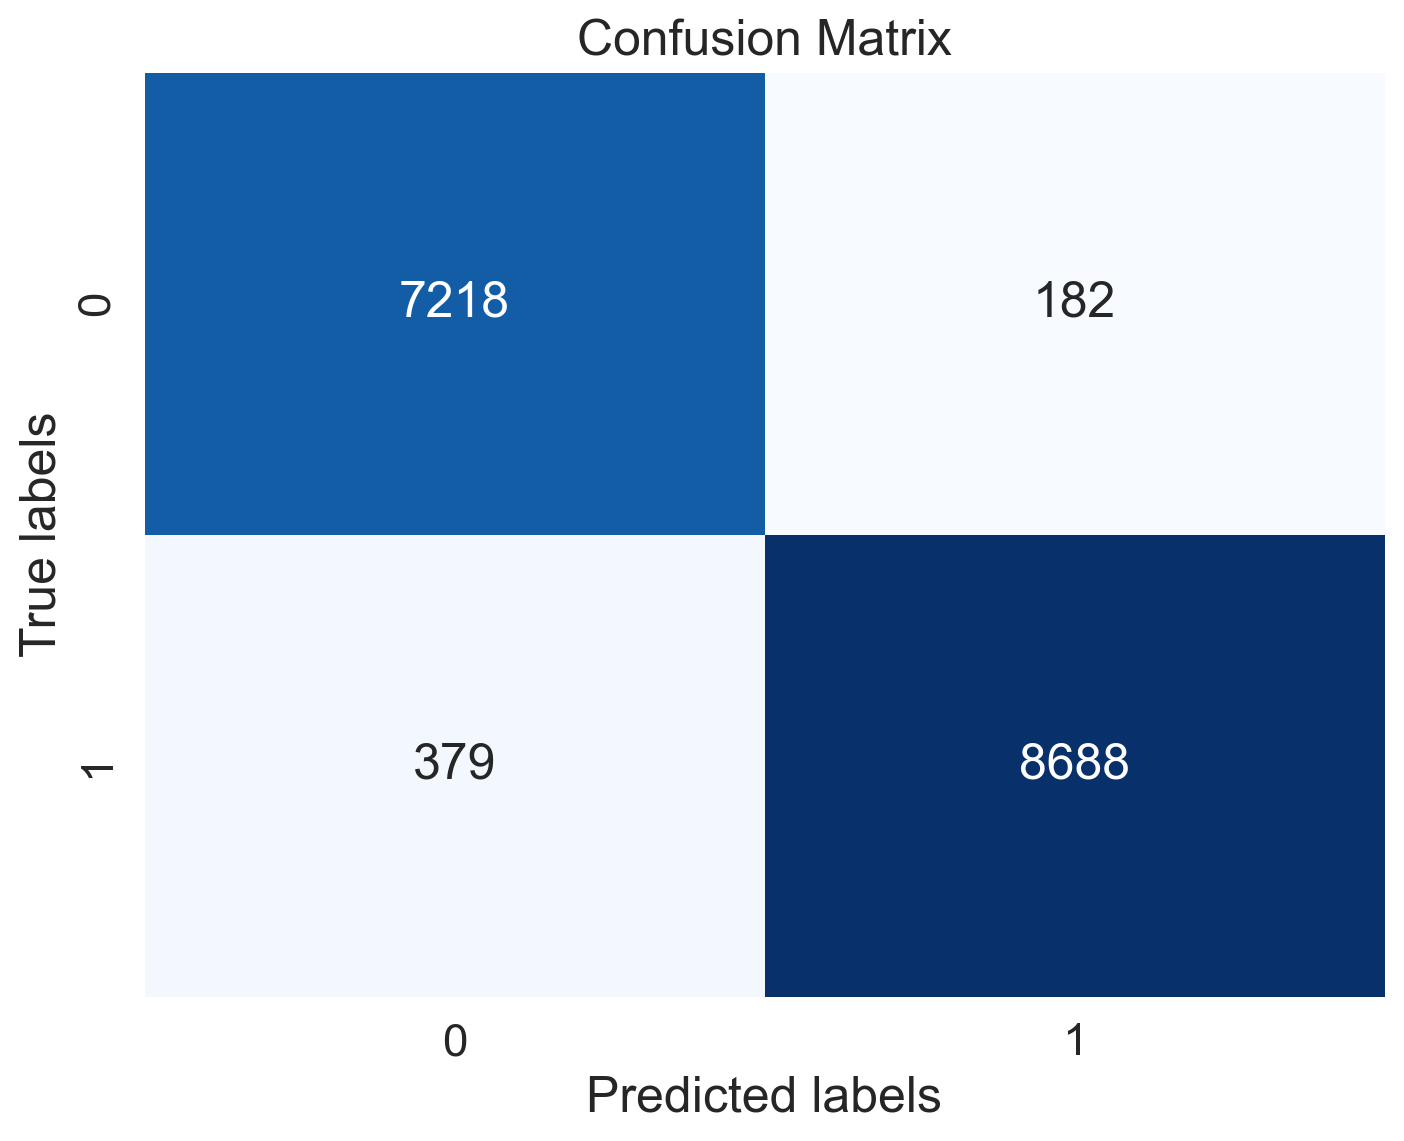

In [47]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming model.predict(X_test) gives the predicted labels
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [48]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install keras-metrics

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [50]:
#Import libraries that will allow you to use keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from keras import metrics
!pip install keras-metrics
import keras_metrics as km 
import keras
import numpy as np
from numpy import array

Defaulting to user installation because normal site-packages is not writeable


In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.optimizers import Adam
from keras import backend as K
import tensorflow as tf

# Custom Metrics Definitions using TensorFlow operations
def recall_m(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)), axis=0)
    possible_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true, 0, 1)), axis=0)
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)), axis=0)
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)), axis=0)
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    f1 = 2*((precision*recall)/(precision+recall+tf.keras.backend.epsilon()))
    return f1


# Assuming you already have X_selected and y from SelectKBest
# Assuming you have split your data into training, validation, and testing sets

fit = best_features.fit(X, y)
X_selected = fit.transform(X)

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_selected, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# One-hot encode labels
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_val_encoded = encoder.transform(y_val.values.reshape(-1, 1)).toarray()
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1)).toarray()

# Build the LSTM model
model = Sequential()
model.add(GRU(units=128, input_shape=(X_train_scaled.shape[1], 1)))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=y_train_encoded.shape[1], activation='softmax'))

# Compile the model with custom metrics
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy', f1_m, precision_m, recall_m])


# Reshape the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_val_reshaped = X_val_scaled.reshape((X_val_scaled.shape[0], X_val_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Train the model
history = model.fit(X_train_reshaped, y_train_encoded, epochs=200, batch_size=32, validation_data=(X_val_reshaped, y_val_encoded))

# Evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test_reshaped, y_test_encoded)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}, F1 Score: {f1_score}, Precision: {precision}, Recall: {recall}')

# Save the trained model if needed
model.save('gru_model_with_selectkbest_200_epochs.h5')


Epoch 1/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 62s 37ms/step - accuracy: 0.7300 - f1_m: 0.7181 - loss: 0.4597 - precision_m: 0.7410 - recall_m: 0.7313 - val_accuracy: 0.8585 - val_f1_m: 0.8518 - val_loss: 0.2745 - val_precision_m: 0.8593 - val_recall_m: 0.8540
Epoch 2/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 56s 37ms/step - accuracy: 0.8695 - f1_m: 0.8649 - loss: 0.2616 - precision_m: 0.8710 - recall_m: 0.8708 - val_accuracy: 0.9122 - val_f1_m: 0.9095 - val_loss: 0.1882 - val_precision_m: 0.9146 - val_recall_m: 0.9179
Epoch 3/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.9150 - f1_m: 0.9118 - loss: 0.1914 - precision_m: 0.9150 - recall_m: 0.9170 - val_accuracy: 0.9126 - val_f1_m: 0.9096 - val_loss: 0.2054 - val_precision_m: 0.9120 - val_recall_m: 0.9158
Epoch 4/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.9235 - f1_m: 0.9202 - loss: 0.1792 - precision_m: 0.9225 - recall_m: 0.9239 - val_accuracy: 0.9283 - val_f1_m: 0.9246 - val_loss: 0.1598 - val_precision_m: 0.

1544/1544 ━━━━━━━━━━━━━━━━━━━━ 73s 34ms/step - accuracy: 0.9714 - f1_m: 0.9703 - loss: 0.0774 - precision_m: 0.9705 - recall_m: 0.9722 - val_accuracy: 0.9674 - val_f1_m: 0.9661 - val_loss: 0.0827 - val_precision_m: 0.9660 - val_recall_m: 0.9688
Epoch 30/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.9714 - f1_m: 0.9703 - loss: 0.0721 - precision_m: 0.9709 - recall_m: 0.9718 - val_accuracy: 0.9695 - val_f1_m: 0.9683 - val_loss: 0.0801 - val_precision_m: 0.9685 - val_recall_m: 0.9701
Epoch 31/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.9708 - f1_m: 0.9696 - loss: 0.0734 - precision_m: 0.9698 - recall_m: 0.9714 - val_accuracy: 0.9707 - val_f1_m: 0.9696 - val_loss: 0.0774 - val_precision_m: 0.9696 - val_recall_m: 0.9717
Epoch 32/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 55s 36ms/step - accuracy: 0.9727 - f1_m: 0.9715 - loss: 0.0719 - precision_m: 0.9718 - recall_m: 0.9733 - val_accuracy: 0.9685 - val_f1_m: 0.9671 - val_loss: 0.0833 - val_precision_m: 0.9679 - va

1544/1544 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.9787 - f1_m: 0.9779 - loss: 0.0561 - precision_m: 0.9781 - recall_m: 0.9791 - val_accuracy: 0.9723 - val_f1_m: 0.9712 - val_loss: 0.0770 - val_precision_m: 0.9708 - val_recall_m: 0.9735
Epoch 58/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.9773 - f1_m: 0.9764 - loss: 0.0578 - precision_m: 0.9764 - recall_m: 0.9779 - val_accuracy: 0.9724 - val_f1_m: 0.9712 - val_loss: 0.0780 - val_precision_m: 0.9714 - val_recall_m: 0.9729
Epoch 59/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.9779 - f1_m: 0.9770 - loss: 0.0562 - precision_m: 0.9776 - recall_m: 0.9781 - val_accuracy: 0.9733 - val_f1_m: 0.9722 - val_loss: 0.0775 - val_precision_m: 0.9722 - val_recall_m: 0.9739
Epoch 60/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.9786 - f1_m: 0.9776 - loss: 0.0558 - precision_m: 0.9779 - recall_m: 0.9790 - val_accuracy: 0.9678 - val_f1_m: 0.9665 - val_loss: 0.0810 - val_precision_m: 0.9664 - va

1544/1544 ━━━━━━━━━━━━━━━━━━━━ 72s 37ms/step - accuracy: 0.9813 - f1_m: 0.9805 - loss: 0.0485 - precision_m: 0.9806 - recall_m: 0.9819 - val_accuracy: 0.9712 - val_f1_m: 0.9701 - val_loss: 0.0795 - val_precision_m: 0.9701 - val_recall_m: 0.9721
Epoch 86/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.9824 - f1_m: 0.9817 - loss: 0.0464 - precision_m: 0.9818 - recall_m: 0.9830 - val_accuracy: 0.9718 - val_f1_m: 0.9705 - val_loss: 0.0809 - val_precision_m: 0.9710 - val_recall_m: 0.9720
Epoch 87/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.9814 - f1_m: 0.9805 - loss: 0.0472 - precision_m: 0.9805 - recall_m: 0.9818 - val_accuracy: 0.9717 - val_f1_m: 0.9706 - val_loss: 0.0842 - val_precision_m: 0.9705 - val_recall_m: 0.9725
Epoch 88/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.9829 - f1_m: 0.9821 - loss: 0.0459 - precision_m: 0.9824 - recall_m: 0.9830 - val_accuracy: 0.9727 - val_f1_m: 0.9715 - val_loss: 0.0820 - val_precision_m: 0.9713 - va

1544/1544 ━━━━━━━━━━━━━━━━━━━━ 77s 36ms/step - accuracy: 0.9820 - f1_m: 0.9813 - loss: 0.0465 - precision_m: 0.9813 - recall_m: 0.9825 - val_accuracy: 0.9698 - val_f1_m: 0.9685 - val_loss: 0.0850 - val_precision_m: 0.9692 - val_recall_m: 0.9699
Epoch 114/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.9815 - f1_m: 0.9807 - loss: 0.0470 - precision_m: 0.9809 - recall_m: 0.9818 - val_accuracy: 0.9713 - val_f1_m: 0.9702 - val_loss: 0.0877 - val_precision_m: 0.9701 - val_recall_m: 0.9722
Epoch 115/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.9839 - f1_m: 0.9832 - loss: 0.0418 - precision_m: 0.9833 - recall_m: 0.9843 - val_accuracy: 0.9724 - val_f1_m: 0.9713 - val_loss: 0.0817 - val_precision_m: 0.9719 - val_recall_m: 0.9725
Epoch 116/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.9822 - f1_m: 0.9814 - loss: 0.0457 - precision_m: 0.9818 - recall_m: 0.9823 - val_accuracy: 0.9703 - val_f1_m: 0.9691 - val_loss: 0.0792 - val_precision_m: 0.9694 -

1544/1544 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.9838 - f1_m: 0.9832 - loss: 0.0425 - precision_m: 0.9836 - recall_m: 0.9838 - val_accuracy: 0.9724 - val_f1_m: 0.9713 - val_loss: 0.0849 - val_precision_m: 0.9716 - val_recall_m: 0.9728
Epoch 142/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.9818 - f1_m: 0.9811 - loss: 0.0451 - precision_m: 0.9816 - recall_m: 0.9818 - val_accuracy: 0.9727 - val_f1_m: 0.9716 - val_loss: 0.0871 - val_precision_m: 0.9723 - val_recall_m: 0.9725
Epoch 143/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 79s 38ms/step - accuracy: 0.9841 - f1_m: 0.9833 - loss: 0.0389 - precision_m: 0.9830 - recall_m: 0.9847 - val_accuracy: 0.9712 - val_f1_m: 0.9700 - val_loss: 0.0874 - val_precision_m: 0.9700 - val_recall_m: 0.9720
Epoch 144/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 61s 40ms/step - accuracy: 0.9827 - f1_m: 0.9820 - loss: 0.0450 - precision_m: 0.9823 - recall_m: 0.9829 - val_accuracy: 0.9729 - val_f1_m: 0.9718 - val_loss: 0.0935 - val_precision_m: 0.9722 -

1544/1544 ━━━━━━━━━━━━━━━━━━━━ 127s 45ms/step - accuracy: 0.9849 - f1_m: 0.9843 - loss: 0.0394 - precision_m: 0.9847 - recall_m: 0.9849 - val_accuracy: 0.9738 - val_f1_m: 0.9727 - val_loss: 0.0907 - val_precision_m: 0.9730 - val_recall_m: 0.9741
Epoch 170/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.9857 - f1_m: 0.9852 - loss: 0.0373 - precision_m: 0.9854 - recall_m: 0.9860 - val_accuracy: 0.9730 - val_f1_m: 0.9719 - val_loss: 0.0965 - val_precision_m: 0.9726 - val_recall_m: 0.9729
Epoch 171/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.9865 - f1_m: 0.9859 - loss: 0.0350 - precision_m: 0.9858 - recall_m: 0.9870 - val_accuracy: 0.9729 - val_f1_m: 0.9718 - val_loss: 0.0900 - val_precision_m: 0.9724 - val_recall_m: 0.9730
Epoch 172/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.9858 - f1_m: 0.9852 - loss: 0.0374 - precision_m: 0.9855 - recall_m: 0.9858 - val_accuracy: 0.9703 - val_f1_m: 0.9691 - val_loss: 0.0922 - val_precision_m: 0.9697 

1544/1544 ━━━━━━━━━━━━━━━━━━━━ 72s 43ms/step - accuracy: 0.9862 - f1_m: 0.9855 - loss: 0.0353 - precision_m: 0.9855 - recall_m: 0.9865 - val_accuracy: 0.9722 - val_f1_m: 0.9712 - val_loss: 0.0908 - val_precision_m: 0.9716 - val_recall_m: 0.9724
Epoch 198/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 67s 44ms/step - accuracy: 0.9843 - f1_m: 0.9838 - loss: 0.0393 - precision_m: 0.9841 - recall_m: 0.9845 - val_accuracy: 0.9718 - val_f1_m: 0.9706 - val_loss: 0.0910 - val_precision_m: 0.9715 - val_recall_m: 0.9715
Epoch 199/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.9859 - f1_m: 0.9852 - loss: 0.0370 - precision_m: 0.9856 - recall_m: 0.9858 - val_accuracy: 0.9730 - val_f1_m: 0.9718 - val_loss: 0.0822 - val_precision_m: 0.9727 - val_recall_m: 0.9726
Epoch 200/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.9833 - f1_m: 0.9826 - loss: 0.0454 - precision_m: 0.9829 - recall_m: 0.9835 - val_accuracy: 0.9742 - val_f1_m: 0.9731 - val_loss: 0.0955 - val_precision_m: 0.9733 -

Test Loss: 0.0940650999546051, Test Accuracy: 0.9738871455192566, F1 Score: 0.9728702902793884, Precision: 0.9731868505477905, Recall: 0.9744735956192017


In [52]:
end_predict = time.time()
model_performance.loc['GRU (Keras)'] = [accuracy, recall, precision, f1_score,end_train-start,end_predict-end_train,end_predict-start]

515/515 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step


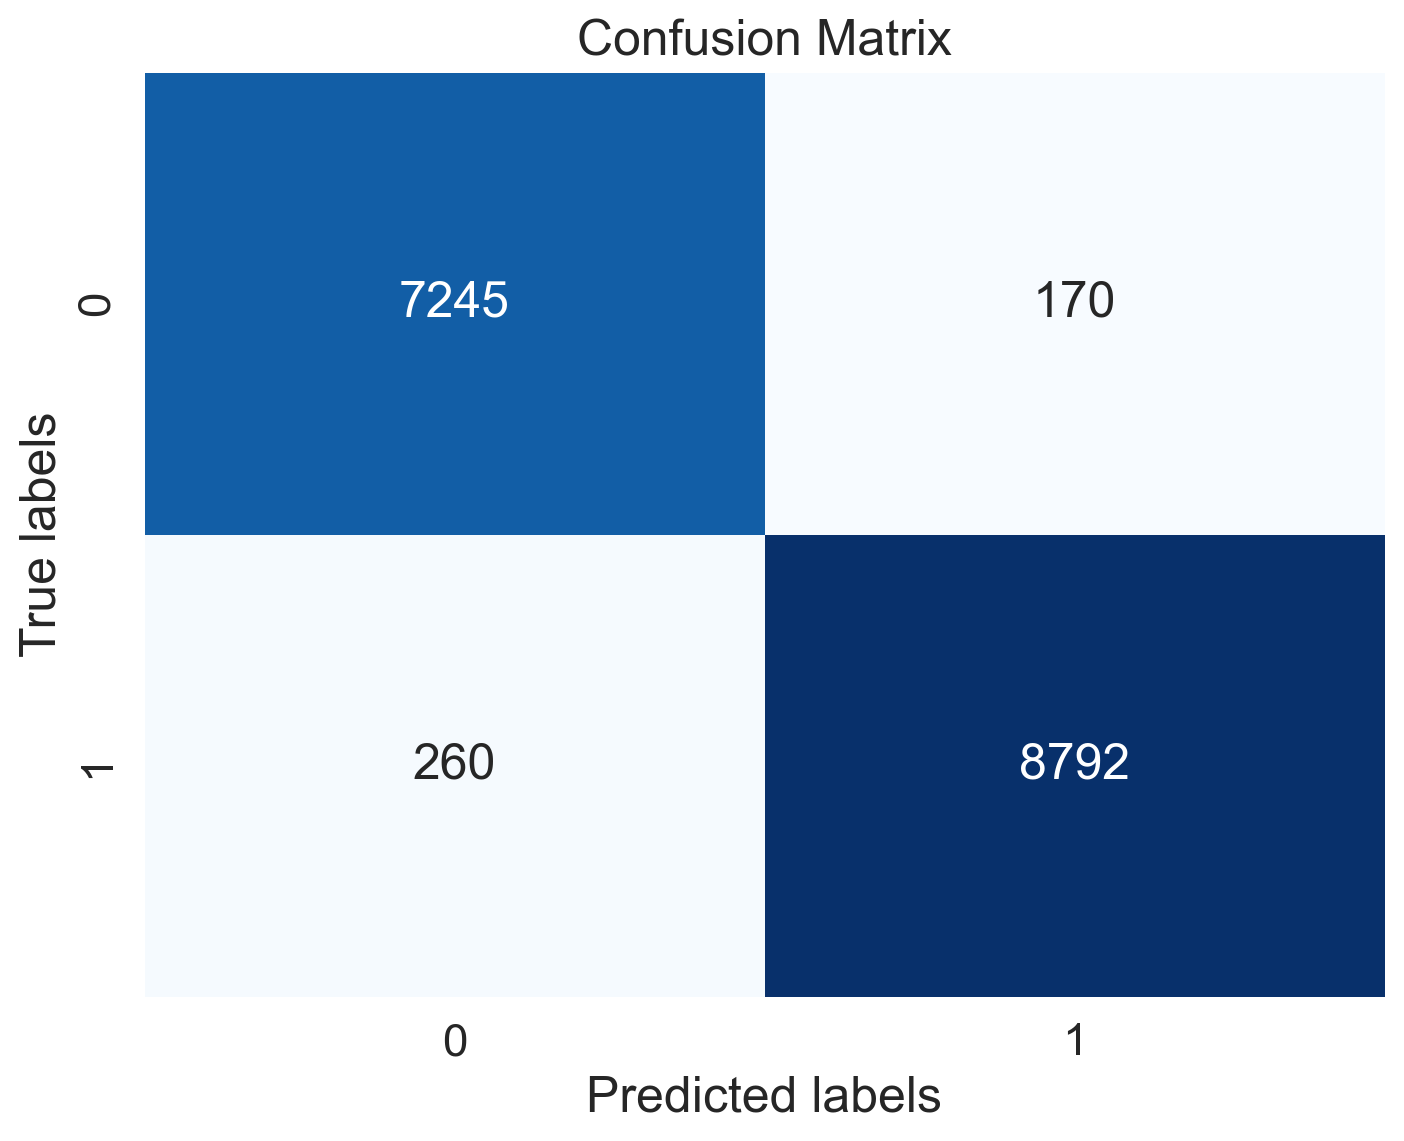

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming model.predict(X_test_reshaped) gives the predicted probabilities
y_pred_probs = model.predict(X_test_reshaped)
# Extract the class with the highest probability for each sample
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate confusion matrix
cm = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



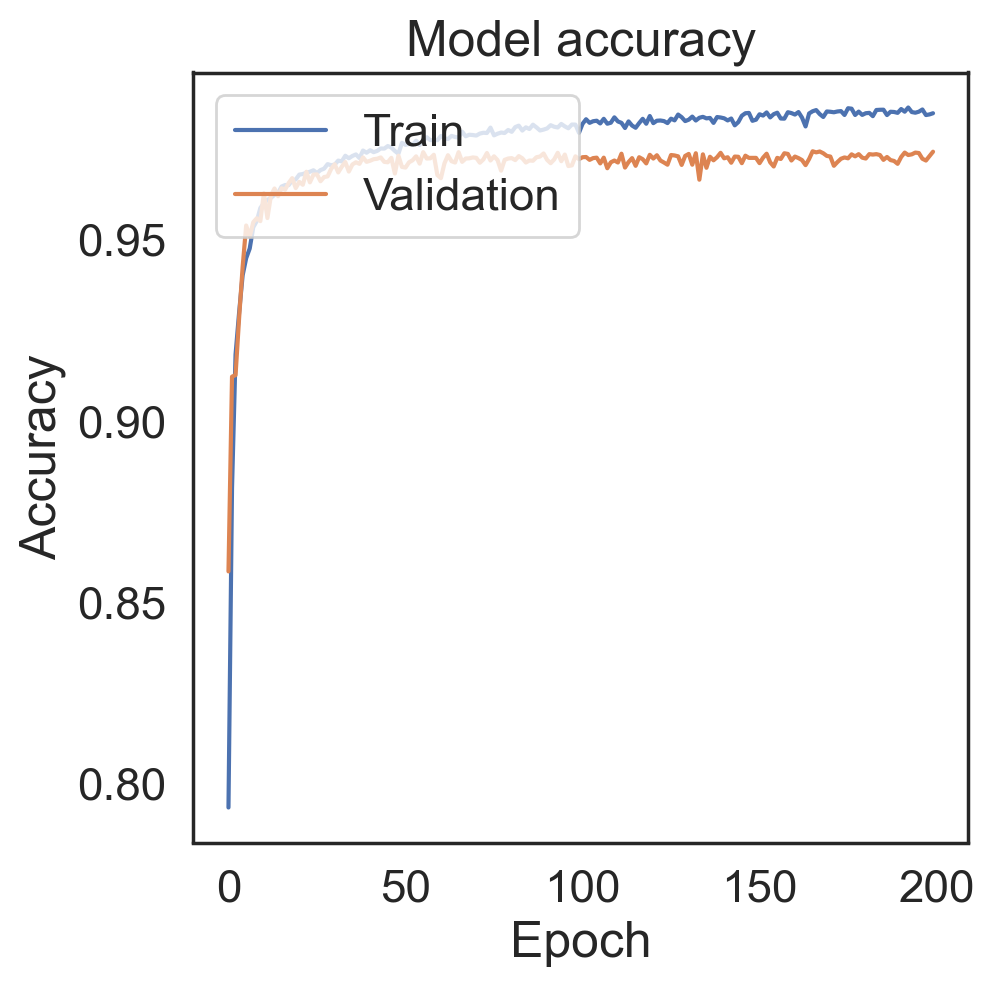

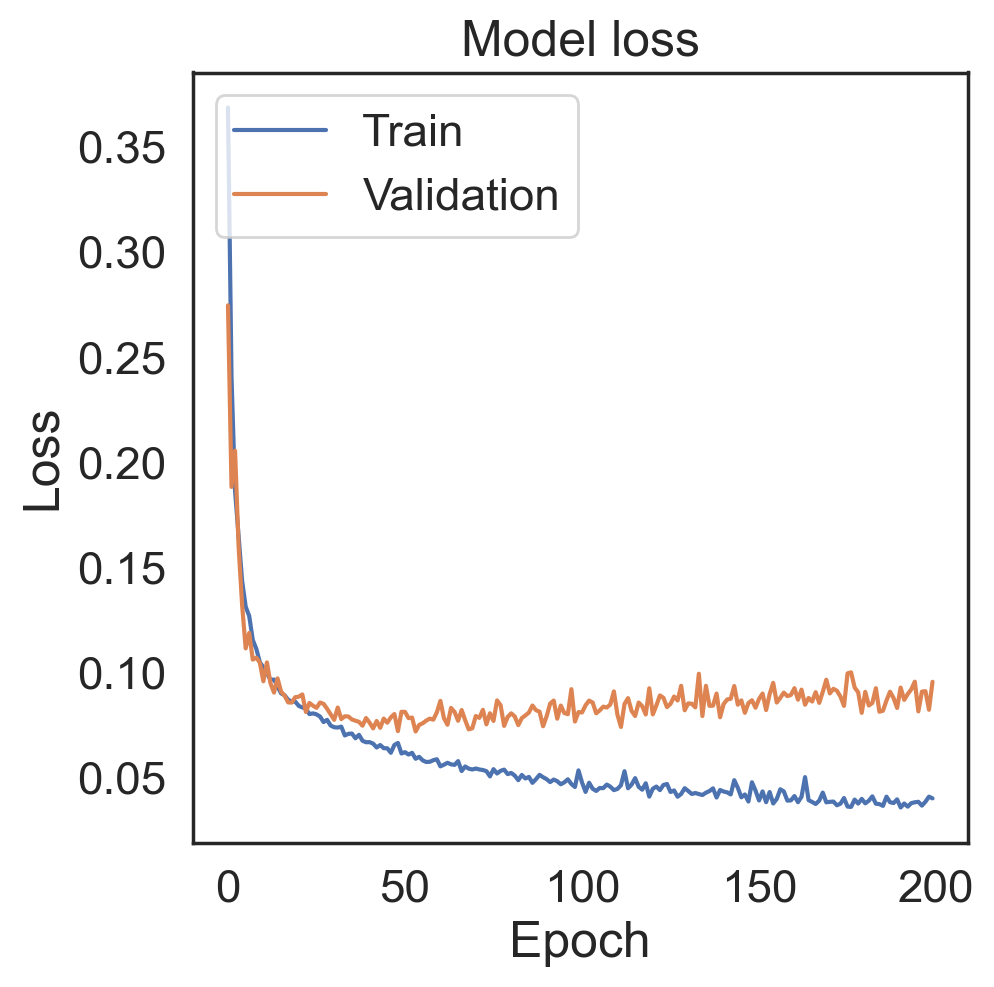

In [55]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [56]:
np.shape(X)

(82332, 56)

In [100]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.optimizers import Adam
from keras import backend as K
import tensorflow as tf

# Custom Metrics Definitions using TensorFlow operations
def recall_m(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)), axis=0)
    possible_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true, 0, 1)), axis=0)
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)), axis=0)
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)), axis=0)
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    f1 = 2*((precision*recall)/(precision+recall+tf.keras.backend.epsilon()))
    return f1


# Assuming you already have X_selected and y from SelectKBest
# Assuming you have split your data into training, validation, and testing sets

fit = best_features.fit(X, y)
X_selected = fit.transform(X)

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_selected, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# One-hot encode labels
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_val_encoded = encoder.transform(y_val.values.reshape(-1, 1)).toarray()
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1)).toarray()

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=128, input_shape=(X_train_scaled.shape[1], 1)))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=y_train_encoded.shape[1], activation='softmax'))

# Compile the model with custom metrics
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy', f1_m, precision_m, recall_m])


# Reshape the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_val_reshaped = X_val_scaled.reshape((X_val_scaled.shape[0], X_val_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Train the model
history = model.fit(X_train_reshaped, y_train_encoded, epochs=200, batch_size=32, validation_data=(X_val_reshaped, y_val_encoded))

# Evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test_reshaped, y_test_encoded)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}, F1 Score: {f1_score}, Precision: {precision}, Recall: {recall}')

# Save the trained model if needed
model.save('lstm_model_with_selectkbest_200_epochs.h5')


Epoch 1/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 92s 57ms/step - accuracy: 0.7557 - f1_m: 0.7461 - loss: 0.4559 - precision_m: 0.7672 - recall_m: 0.7569 - val_accuracy: 0.8371 - val_f1_m: 0.8322 - val_loss: 0.2966 - val_precision_m: 0.8401 - val_recall_m: 0.8419
Epoch 2/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 92s 59ms/step - accuracy: 0.8695 - f1_m: 0.8647 - loss: 0.2615 - precision_m: 0.8709 - recall_m: 0.8723 - val_accuracy: 0.8961 - val_f1_m: 0.8928 - val_loss: 0.2118 - val_precision_m: 0.8984 - val_recall_m: 0.9021
Epoch 3/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 91s 59ms/step - accuracy: 0.8933 - f1_m: 0.8899 - loss: 0.2158 - precision_m: 0.8942 - recall_m: 0.8976 - val_accuracy: 0.9053 - val_f1_m: 0.9023 - val_loss: 0.1981 - val_precision_m: 0.9064 - val_recall_m: 0.9105
Epoch 4/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 91s 59ms/step - accuracy: 0.9027 - f1_m: 0.8994 - loss: 0.2013 - precision_m: 0.9036 - recall_m: 0.9066 - val_accuracy: 0.9103 - val_f1_m: 0.9072 - val_loss: 0.1799 - val_precision_m: 0.

1544/1544 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.9653 - f1_m: 0.9639 - loss: 0.0897 - precision_m: 0.9643 - recall_m: 0.9661 - val_accuracy: 0.9608 - val_f1_m: 0.9593 - val_loss: 0.0984 - val_precision_m: 0.9599 - val_recall_m: 0.9610
Epoch 30/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.9658 - f1_m: 0.9643 - loss: 0.0867 - precision_m: 0.9652 - recall_m: 0.9659 - val_accuracy: 0.9630 - val_f1_m: 0.9614 - val_loss: 0.0928 - val_precision_m: 0.9619 - val_recall_m: 0.9632
Epoch 31/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.9657 - f1_m: 0.9642 - loss: 0.0864 - precision_m: 0.9649 - recall_m: 0.9660 - val_accuracy: 0.9637 - val_f1_m: 0.9620 - val_loss: 0.0927 - val_precision_m: 0.9635 - val_recall_m: 0.9628
Epoch 32/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.9666 - f1_m: 0.9654 - loss: 0.0850 - precision_m: 0.9660 - recall_m: 0.9672 - val_accuracy: 0.9645 - val_f1_m: 0.9629 - val_loss: 0.0874 - val_precision_m: 0.9640 - va

1544/1544 ━━━━━━━━━━━━━━━━━━━━ 128s 44ms/step - accuracy: 0.9730 - f1_m: 0.9718 - loss: 0.0695 - precision_m: 0.9725 - recall_m: 0.9732 - val_accuracy: 0.9651 - val_f1_m: 0.9637 - val_loss: 0.0890 - val_precision_m: 0.9644 - val_recall_m: 0.9654
Epoch 58/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.9737 - f1_m: 0.9726 - loss: 0.0672 - precision_m: 0.9729 - recall_m: 0.9743 - val_accuracy: 0.9657 - val_f1_m: 0.9644 - val_loss: 0.0859 - val_precision_m: 0.9653 - val_recall_m: 0.9655
Epoch 59/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.9742 - f1_m: 0.9731 - loss: 0.0662 - precision_m: 0.9733 - recall_m: 0.9747 - val_accuracy: 0.9696 - val_f1_m: 0.9684 - val_loss: 0.0820 - val_precision_m: 0.9691 - val_recall_m: 0.9696
Epoch 60/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.9754 - f1_m: 0.9744 - loss: 0.0621 - precision_m: 0.9746 - recall_m: 0.9758 - val_accuracy: 0.9693 - val_f1_m: 0.9680 - val_loss: 0.0805 - val_precision_m: 0.9685 - v

1544/1544 ━━━━━━━━━━━━━━━━━━━━ 80s 44ms/step - accuracy: 0.9797 - f1_m: 0.9788 - loss: 0.0528 - precision_m: 0.9789 - recall_m: 0.9804 - val_accuracy: 0.9698 - val_f1_m: 0.9685 - val_loss: 0.0852 - val_precision_m: 0.9694 - val_recall_m: 0.9695
Epoch 86/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.9810 - f1_m: 0.9802 - loss: 0.0491 - precision_m: 0.9806 - recall_m: 0.9812 - val_accuracy: 0.9681 - val_f1_m: 0.9666 - val_loss: 0.0903 - val_precision_m: 0.9680 - val_recall_m: 0.9672
Epoch 87/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.9789 - f1_m: 0.9779 - loss: 0.0541 - precision_m: 0.9781 - recall_m: 0.9795 - val_accuracy: 0.9691 - val_f1_m: 0.9678 - val_loss: 0.0872 - val_precision_m: 0.9686 - val_recall_m: 0.9689
Epoch 88/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 66s 43ms/step - accuracy: 0.9806 - f1_m: 0.9797 - loss: 0.0503 - precision_m: 0.9800 - recall_m: 0.9807 - val_accuracy: 0.9688 - val_f1_m: 0.9676 - val_loss: 0.0851 - val_precision_m: 0.9678 - va

1544/1544 ━━━━━━━━━━━━━━━━━━━━ 79s 44ms/step - accuracy: 0.9847 - f1_m: 0.9841 - loss: 0.0380 - precision_m: 0.9844 - recall_m: 0.9849 - val_accuracy: 0.9677 - val_f1_m: 0.9662 - val_loss: 0.1063 - val_precision_m: 0.9673 - val_recall_m: 0.9671
Epoch 114/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.9863 - f1_m: 0.9858 - loss: 0.0364 - precision_m: 0.9858 - recall_m: 0.9867 - val_accuracy: 0.9693 - val_f1_m: 0.9680 - val_loss: 0.1066 - val_precision_m: 0.9693 - val_recall_m: 0.9684
Epoch 115/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.9864 - f1_m: 0.9859 - loss: 0.0341 - precision_m: 0.9859 - recall_m: 0.9868 - val_accuracy: 0.9712 - val_f1_m: 0.9699 - val_loss: 0.0948 - val_precision_m: 0.9706 - val_recall_m: 0.9709
Epoch 116/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.9875 - f1_m: 0.9870 - loss: 0.0325 - precision_m: 0.9871 - recall_m: 0.9877 - val_accuracy: 0.9690 - val_f1_m: 0.9677 - val_loss: 0.1099 - val_precision_m: 0.9687 -

1544/1544 ━━━━━━━━━━━━━━━━━━━━ 69s 45ms/step - accuracy: 0.9874 - f1_m: 0.9869 - loss: 0.0321 - precision_m: 0.9874 - recall_m: 0.9873 - val_accuracy: 0.9689 - val_f1_m: 0.9677 - val_loss: 0.1030 - val_precision_m: 0.9684 - val_recall_m: 0.9688
Epoch 142/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.9889 - f1_m: 0.9884 - loss: 0.0290 - precision_m: 0.9884 - recall_m: 0.9892 - val_accuracy: 0.9694 - val_f1_m: 0.9681 - val_loss: 0.0993 - val_precision_m: 0.9690 - val_recall_m: 0.9691
Epoch 143/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.9892 - f1_m: 0.9888 - loss: 0.0295 - precision_m: 0.9889 - recall_m: 0.9894 - val_accuracy: 0.9688 - val_f1_m: 0.9675 - val_loss: 0.1148 - val_precision_m: 0.9681 - val_recall_m: 0.9688
Epoch 144/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 69s 45ms/step - accuracy: 0.9904 - f1_m: 0.9901 - loss: 0.0274 - precision_m: 0.9901 - recall_m: 0.9906 - val_accuracy: 0.9688 - val_f1_m: 0.9676 - val_loss: 0.1039 - val_precision_m: 0.9683 -

1544/1544 ━━━━━━━━━━━━━━━━━━━━ 80s 44ms/step - accuracy: 0.9908 - f1_m: 0.9904 - loss: 0.0253 - precision_m: 0.9907 - recall_m: 0.9908 - val_accuracy: 0.9696 - val_f1_m: 0.9683 - val_loss: 0.1297 - val_precision_m: 0.9688 - val_recall_m: 0.9695
Epoch 170/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.9911 - f1_m: 0.9907 - loss: 0.0232 - precision_m: 0.9907 - recall_m: 0.9913 - val_accuracy: 0.9667 - val_f1_m: 0.9653 - val_loss: 0.1325 - val_precision_m: 0.9664 - val_recall_m: 0.9662
Epoch 171/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.9912 - f1_m: 0.9909 - loss: 0.0248 - precision_m: 0.9911 - recall_m: 0.9912 - val_accuracy: 0.9701 - val_f1_m: 0.9688 - val_loss: 0.1094 - val_precision_m: 0.9695 - val_recall_m: 0.9700
Epoch 172/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 69s 45ms/step - accuracy: 0.9916 - f1_m: 0.9912 - loss: 0.0216 - precision_m: 0.9915 - recall_m: 0.9915 - val_accuracy: 0.9635 - val_f1_m: 0.9619 - val_loss: 0.1153 - val_precision_m: 0.9640 -

1544/1544 ━━━━━━━━━━━━━━━━━━━━ 70s 46ms/step - accuracy: 0.9933 - f1_m: 0.9930 - loss: 0.0186 - precision_m: 0.9931 - recall_m: 0.9934 - val_accuracy: 0.9667 - val_f1_m: 0.9652 - val_loss: 0.1253 - val_precision_m: 0.9664 - val_recall_m: 0.9660
Epoch 198/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.9931 - f1_m: 0.9928 - loss: 0.0197 - precision_m: 0.9930 - recall_m: 0.9931 - val_accuracy: 0.9669 - val_f1_m: 0.9656 - val_loss: 0.1382 - val_precision_m: 0.9665 - val_recall_m: 0.9665
Epoch 199/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 75s 49ms/step - accuracy: 0.9934 - f1_m: 0.9931 - loss: 0.0175 - precision_m: 0.9934 - recall_m: 0.9932 - val_accuracy: 0.9682 - val_f1_m: 0.9669 - val_loss: 0.1395 - val_precision_m: 0.9674 - val_recall_m: 0.9681
Epoch 200/200
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 70s 46ms/step - accuracy: 0.9922 - f1_m: 0.9919 - loss: 0.0200 - precision_m: 0.9922 - recall_m: 0.9921 - val_accuracy: 0.9665 - val_f1_m: 0.9651 - val_loss: 0.1361 - val_precision_m: 0.9666 -

In [101]:
end_predict = time.time()
model_performance.loc['LSTM (Keras)'] = [accuracy, recall, precision, f1_score,end_train-start,end_predict-end_train,end_predict-start]

515/515 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step


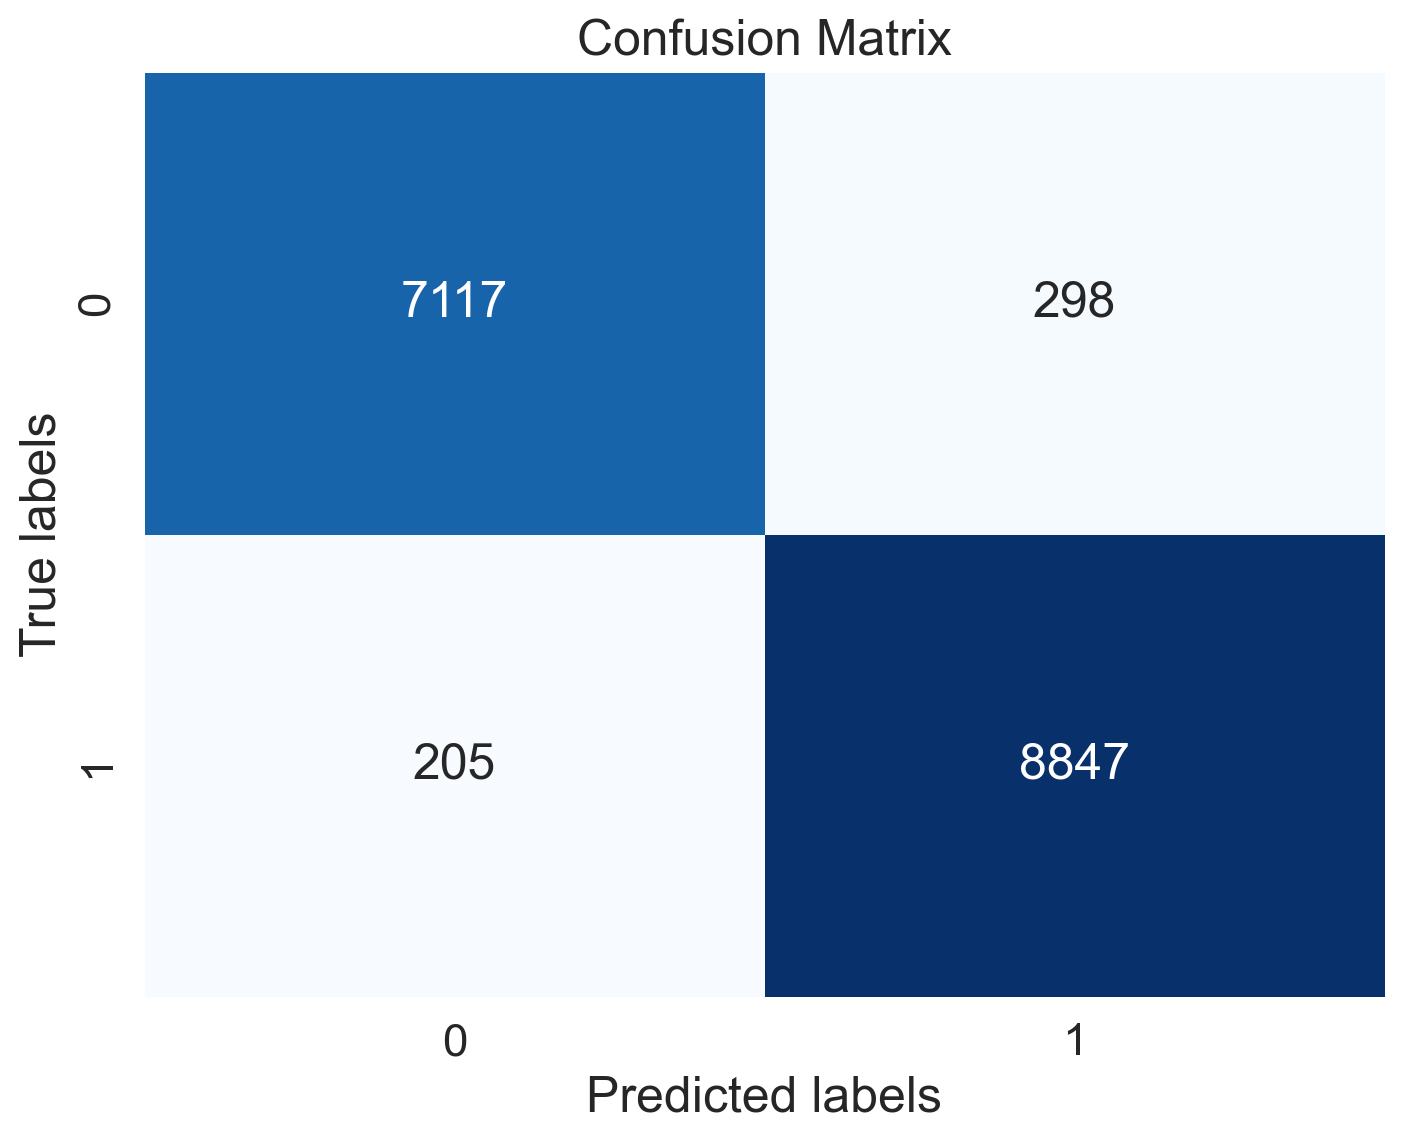

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming model.predict(X_test_reshaped) gives the predicted probabilities
y_pred_probs = model.predict(X_test_reshaped)
# Extract the class with the highest probability for each sample
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate confusion matrix
cm = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



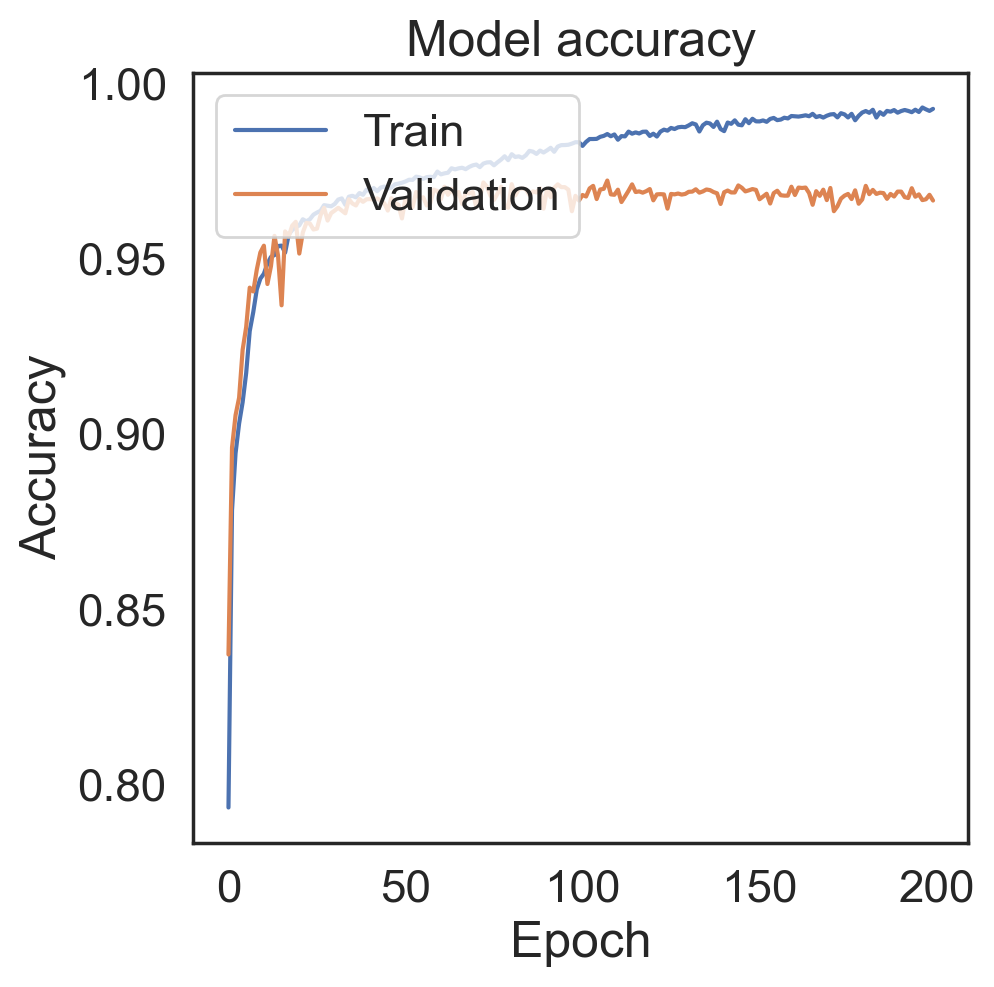

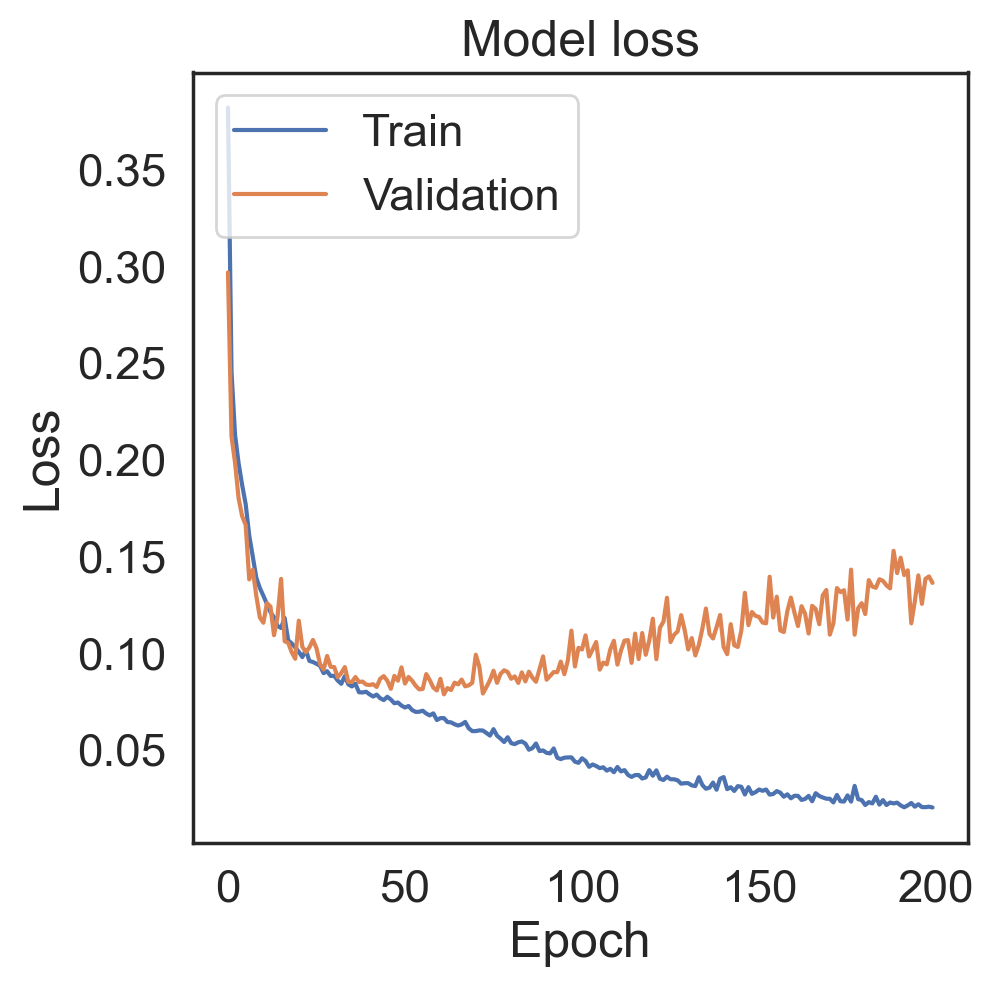

In [103]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [108]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.4%}',
                                                                     'Precision': '{:.4%}',
                                                                     'Recall': '{:.4%}',
                                                                     'F1-Score': '{:.4%}',
                                                                     'time to train':'{:.2f}',
                                                                     'time to predict':'{:.2f}',
                                                                     'total time':'{:.2f}'
                                                                     })

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
Logistic,92.8099%,92.9194%,93.9556%,93.4346%,0.73,0.00,0.73
kNN,96.2167%,96.1114%,96.9792%,96.5433%,0.15,3.78,3.92
Decision Tree,96.5385%,96.9399%,96.7689%,96.8543%,1.10,0.01,1.10
Random Forest,96.8908%,96.9178%,97.4128%,97.1647%,0.34,0.02,0.36
MLP,96.5932%,95.8200%,97.9481%,96.8724%,21.70,0.00,21.70
GRU (Keras),97.3887%,97.4474%,97.3187%,97.2870%,21.70,14147.47,14169.17
LSTM (Keras),96.9454%,96.8432%,97.0002%,96.8111%,0.01,30311.18,30311.19
